# 1. Business understanding

- Dự đoán giá nhà là một bài toán khá thiết thực khi ta muốn dự kiến trước số tiền cần phải bỏ ra để sở hữu một ngôi nhà. Hoặc các công ty bất động sản cần ước lượng trước giá cả để xây dựng phương án đầu tư hợp lý. Dự án này tập trung vào dự đoán giá nhà ở thành phố Ames, bang Iowa theo [một cuộc thi trên trang kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).
- Có rất nhiều yếu tố có thể ảnh hưởng tới giá của một ngôi nhà như: diện tích, vị trí, sân vườn, nội thất, ngoại thất, ...
- Mục tiêu dự án: dựa vào dữ liệu đã thu thập được xây dựng mô hình cơ sở LinearRegression (vì dự đoán giá nhà là một bài toán hồi quy tuyến tính), sau đó cố gắng xây dựng các mô hình có chất lượng cao nhất có thể và tốt hơn mô hình cơ sở đã tạo.
- Tiêu chí đánh giá dự án thành công là tạo được mô hình có giá trị MAPE thấp hơn 15% và giá trị R2 từ 0.85 trở lên.
    - MAPE (metric chính): Mô hình tệ có thể khiến MAPE cao hơn 100%, tùy vào bài toán nhưng thường MAPE thấp hơn 20% được đánh giá là tốt.
    - R2 (metric phụ, để kiểm tra khả năng mô tả dữ liệu của models): Mô hình không tốt có thể có giá trị R2 âm, mô hình tốt sẽ có giá trị R2 lớn hơn 0 và tốt nhất khi giá trị R2 bằng 1. Giá trị R2 ở mức nào thì mô hình đạt chất lượng còn tùy thuộc vào từng yêu cầu bài toán, mức 0.75 được coi là tốt đối với hầu hết trường hợp.

# 2. Data understanding

## 2.1. Data description

Dữ liệu đã thu thập được lưu trữ dưới dạng file csv và có các fields sau:

| No. | Field name | Description || No. | Field name | Description |
| --- | --- | --- | --- | --- | --- | --- |
| 01 | ID | Mã định danh của mỗi ngôi nhà || 41 | HeatingQC | Chất lượng và điều kiện máy sưởi |
| 02 | MSSubClass | Loại nhà || 42 | CentralAir | Máy điều hòa trung tâm |
| 03 | MSZoning | Phân loại khu vực || 43 | Electrical | Hệ thống điện |
| 04 | LotFrontage | Lề đường trước nhà || 44 | 1stFlrSF | Diện tích tầng 1 |
| 05 | LotArea | Diện tích lô || 45 | 2ndFlrSF | Diện tích tầng 2 |
| 06 | Street | Loại đường trước nhà (sỏi/trải nhựa) || 46 | LowQualFinSF | Diện tích hoàn thiện kém chất lượng (tất cả các tầng) |
| 07 | Alley | Loại ngõ vô nhà (sỏi/trải nhựa) || 47 | GrLivArea | Diện tích sinh hoạt (phía trên mặt đất) |
| 08 | LotShape | Hình dạng lô đất || 48 | BsmtFullBath | Tầng hầm đầy đủ phòng tắm |
| 09 | LandContour | Độ phẳng của lô đất || 49 | BsmtHalfBath | Tầng hầm nửa số phòng tắm |
| 10 | Utilities | Tiện ích có sẵn || 50 | FullBath | Đầy đủ nhà tắm phía trên mặt đất |
| 11 | LotConfig | Thế đất (ngõ cụt, 2 mặt tiền, 3 mặt tiền, ...) || 51 | HalfBath | Nửa số nhà tắm phia trên mặt đất |
| 12 | LandSlope | Độ dốc đất || 52 | Bedroom | Số phòng ngủ phía trên (không tính tầng hầm) |
| 13 | Neighborhood | Vị trí (trong thành phố Ames, bang Iowa) || 53 | Kitchen | Số nhà bếp phía trên |
| 14 | Condition1 | Có ở gần tuyến đường huyết mạch, đường sắt, ... nào không || 54 | KitchenQual | Chất lượng nhà bếp |
| 15 | Condition2 | Liệt kê thêm nếu ngôi nhà ở gần hơn 1 tuyến đường huyết mạch, đường sắt, ... || 55 | TotRmsAbvGrd | Tổng phòng phía trên (không tính nhà tắm) |
| 16 | BldgType | Loại nhà ở (nhà riêng 1 gia đình / 2 gia đình / nhà phố / ... ) || 56 | Functional | Chức năng nhà (Chức năng căn bản trừ khi các khoản khấu trừ được đảm bảo) |
| 17 | HouseStyle | Phong cách xây dựng || 57 | Fireplaces | Số lò sưởi (đốt bằng lửa) |
| 18 | OverallQual | Đánh giá vật liệu tổng thể và hoàn thiện của ngôi nhà || 58 | FireplaceQu | Chất lượng lò sưởi |
| 19 | OverallCond | Đánh giá tình trạng chung của ngôi nhà || 59 | GarageType | Vị trí ga-ra |
| 20 | YearBuilt | Năm xây dựng || 60 | GarageYrBlt | Năm xây ga-ra |
| 21 | YearRemodAdd | Năm tu sửa || 61 | GarageFinish | Hoàn thiện nội thất ga-ra |
| 22 | RoofStyle | Loại mái || 62 | GarageCars | Ga-ra chứa khoảng mấy chiêc xe hơi |
| 23 | RoofMatl | Vật liệu làm mái nhà || 63 | GarageArea | Diện tích ga-ra |
| 24 | Exterior1st | Lớp phủ ngôi nhà || 64 | GarageQual | Chất lượng ga-ra |
| 25 | Exterior2nd | Lớp phủ ngôi nhà (nếu nhà được phủ bởi 2 loại vật liệu) || 65 | GarageCond | Tình trạng ga-ra |
| 26 | MasVnrType | Loại gạch ốp (gạch, đá, gỗ, ...) || 66 | PavedDrive | Đường xe ra có trải nhựa không |
| 27 | MasVnrArea | Diện tích gạch ốp || 67 | WoodDeckSF | Diện tích sàn gỗ |
| 28 | ExterQual | Đánh giá chất lượng vật liệu bên ngoài || 68 | OpenPorchSF | Diện tích hiên nhà (mở) |
| 29 | ExterCond | Đánh giá tình trạng hiện tại của vật liệu bên ngoài || 69 | EnclosedPorch | Diện tích hiên nhà (vây kín) |
| 30 | Foundation | Loại móng nhà || 70 | 3SsnPorch | Diện tích hiên nhà 3 mùa |
| 31 | BsmtQual | Đánh giá chiều cao của tầng hầm || 71 | ScreenPorch | Diện tích hiên có màn che (ngăn côn trùng, chắn bớt nắng, ...) |
| 32 | BsmtCond | Đánh giá tình trạng chung của tầng hầm || 72 | PoolArea | Diện tích hồ bơi |
| 33 | BsmtExposure | Mức thông thoáng của tầng hầm || 73 | PoolQC | Chất lượng hồ bơi |
| 34 | BsmtFinType1 | Đánh giá khu vực hoàn thiện tầng hầm || 74 | Fence | Chất lượng hàng rào |
| 35 | BsmtFinSF1 | Diện tích khu vực hoàn thiện 1 || 75 | MiscFeature | Tính năng khác (chưa được đề cập trong các danh mục trên) |
| 36 | BsmtFinType2 | Đánh giá khu vực hoàn thiện tầng hầm loại 2 || 76 | MiscVal | Giá trị của các tính năng khác |
| 37 | BsmtFinSF2 | Diện tích khu vực hoàn thiện 2 || 77 | MoSold | Tháng nhà được bán |
| 38 | BsmtUnfSF | Diện tích tầng hầm chưa hoàn thành || 78 | YrSold | Năm ngôi nhà được bán |
| 39 | TotalBsmtSF | Tổng diện tích tầng hầm || 79 | SaleType | Loại hợp đồng mua bán nhà |
| 40 | Heating | Loại hình sưởi || 80 | SaleCondition | Loại hình (điều kiện) mua bán |
|  |  |  || 81 | SalePrice | Giá bán |

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, r_regression
from scipy.stats import skew

pd.options.display.float_format = '{:,.4f}'.format

In [2]:
data = pd.read_csv(filepath_or_buffer="../data/house_price.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
data.shape

(1460, 81)

Dữ liệu thu thập được gồm 81 cột và 1,460 dòng. Với số lượng dữ liệu như thế này tuy chưa nhiều nhưng bài toán chỉ tập trung một khu vực và là cuộc thi kaggle ta sẽ thử submit dự đoán để xem kết quả nên không cần phải thu thập thêm dữ liệu.

## 2.2. Exploratory Data Analysis

Trước tiên hãy xem mục tiêu của chúng ta (giá bán) như thế nào:

In [4]:
data["SalePrice"].describe()

count     1,460.0000
mean    180,921.1959
std      79,442.5029
min      34,900.0000
25%     129,975.0000
50%     163,000.0000
75%     214,000.0000
max     755,000.0000
Name: SalePrice, dtype: float64

Giá nhà thấp nhất là 34,900 chứ không phải 0, đó là dấu hiệu tốt khi không có giá trị nào bị mất ở đây. Kiểm tra outlier:

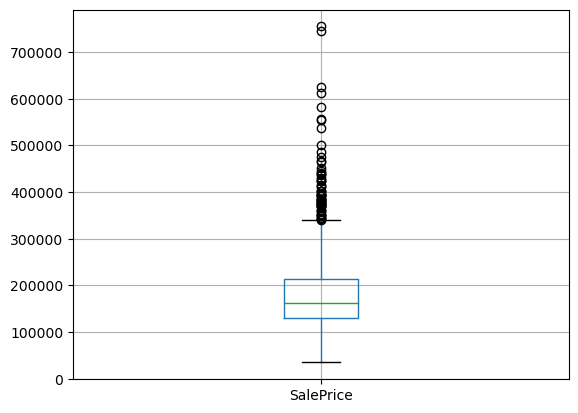

In [5]:
data[["SalePrice"]].boxplot()
plt.show()

Có vẻ có rất nhiều outlier, điều này cũng không quá bất thường vì đương nhiên có những ngôi nhà sang trọng nhiều tiện nghi sẽ có giá cao hơn nhiều so với mặt bằng chung. Tuy nhiên có 2 điểm dữ liệu quá cao so với các dữ liệu còn lại, hãy để ý chúng. Giá nhà của chúng ta có phân phối ra sao ?

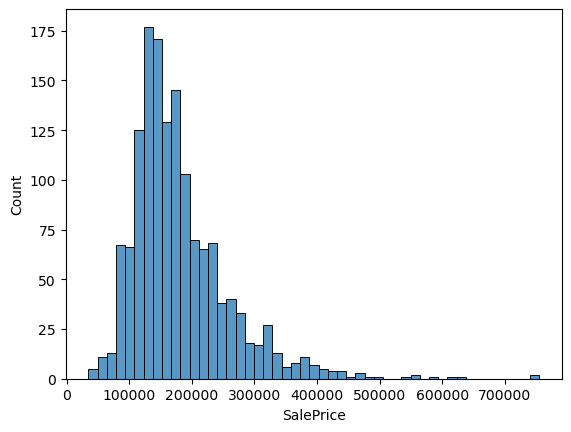

In [6]:
sns.histplot(data["SalePrice"])
plt.show()

Những giá trị outlier khiến cho phân phối của giá nhà có xu hướng kéo dài về bên phải. Ta có thể áp dụng hàm log để giá nhà có phân phối chuẩn, khi dự đoán sẽ cần chuyển đổi ngược lại.

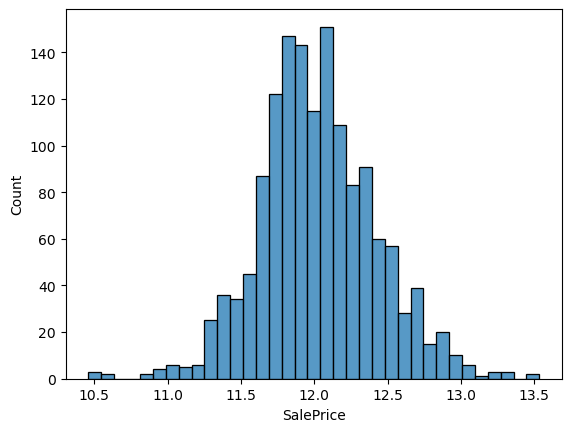

In [7]:
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.histplot(data["SalePrice"])
plt.show()

Sau khi chuyển ta thấy một số dữ liệu giá nhà thấp xuất hiện như những outlier rất mạnh.

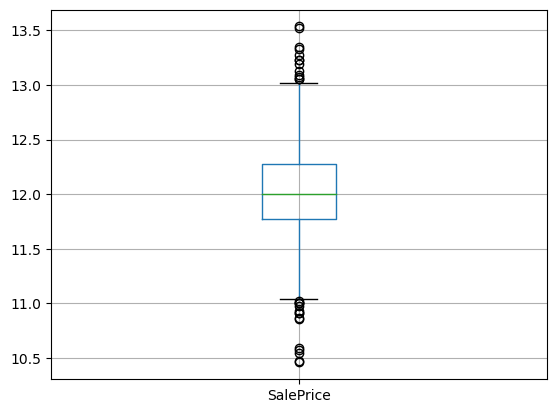

In [8]:
data[["SalePrice"]].boxplot()
plt.show()

Ta sẽ cần ghi nhớ cả những điểm dữ liệu này nữa.

Tiếp theo ta kiểm tra ảnh hưởng của các đặc trưng lên giá nhà. Bắt đầu bằng việc xử lý các giá trị NaN

In [9]:
nan_columns = data.columns[data.isna().any()]
data[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

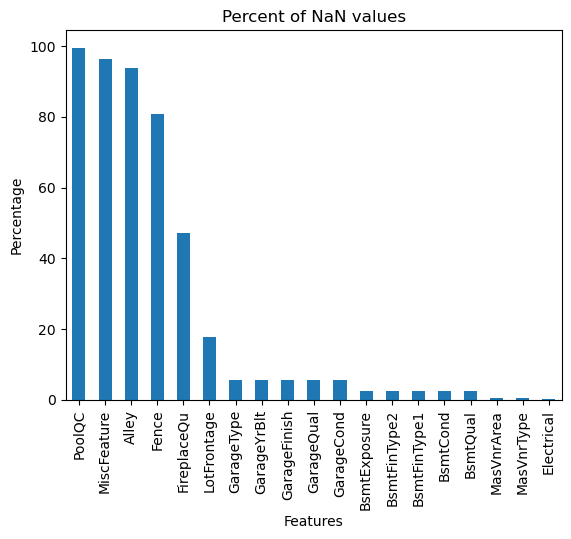

In [10]:
missing = data[nan_columns].isnull().sum() / len(data) * 100
missing.sort_values(ascending=False, inplace=True)
missing.plot.bar()
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Percent of NaN values')
plt.show()

Các trường "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature" có quá nhiều giá trị NaN nên ta sẽ loại bỏ chúng. Và cột "GarageYrBlt" cũng sẽ bị loại vì không có giá trị nào phù hợp để thay thế giá trị NaN ở đây (NaN là không có ga-ra, chúng ta sẽ để năm xây ga-ra giá trị nào khi không có ga-ra?). Hai đặc trưng dạng số "LotFrontage" và "MasVnrArea" sẽ điền giá trị 0. Các trường còn lại tùy vào ý nghĩa của chúng mà ta thay giá trị NaN bằng các giá trị như "None", "No_gara" hay "No_bsmt" (no basement).

In [17]:
# Also drop column "Id" because we don't use it
data = data.drop(columns=["Id", "Alley", "FireplaceQu", "GarageYrBlt", "PoolQC", "Fence", "MiscFeature"])

fillna_values = {
    "LotFrontage": 0,
    "MasVnrType": "None",
    "MasVnrArea": 0,
    "BsmtQual": "No_bsmt",
    "BsmtCond": "No_bsmt",
    "BsmtExposure": "No_bsmt",
    "BsmtFinType1": "No_bsmt",
    "BsmtFinType2": "No_bsmt",
    "Electrical": "None",
    "GarageType": "No_gara",
    "GarageFinish": "No_gara",
    "GarageQual": "No_gara",
    "GarageCond": "No_gara",
}
data = data.fillna(value=fillna_values)

Việc sử dụng các năm xây dựng như số nguyên có vể không hợp lý, có lẽ chúng ta sẽ dùng trường "YrSold" để tính toán thành tuổi của ngôi nhà sẽ hợp lý hơn.

In [18]:
data["HouseAge"] = data["YrSold"] - data["YearBuilt"]
data["RemodelAge"] = data["YrSold"] - data["YearRemodAdd"]

data = data.drop(columns=["YearBuilt", "YearRemodAdd", "YrSold"])

Lấy ra các cột dạng số và dạng phân loại để kiểm tra ảnh hưởng của chúng lên giá nhà

In [19]:
category_columns = data.select_dtypes(include=["object"]).columns.tolist()
numerical_columns = data.select_dtypes(exclude=["object"]).columns.tolist()

# Remove "SalePrice" as it is our target
numerical_columns.remove("SalePrice")

Vẽ biểu đồ để xem qua các đặc trưng category một chút

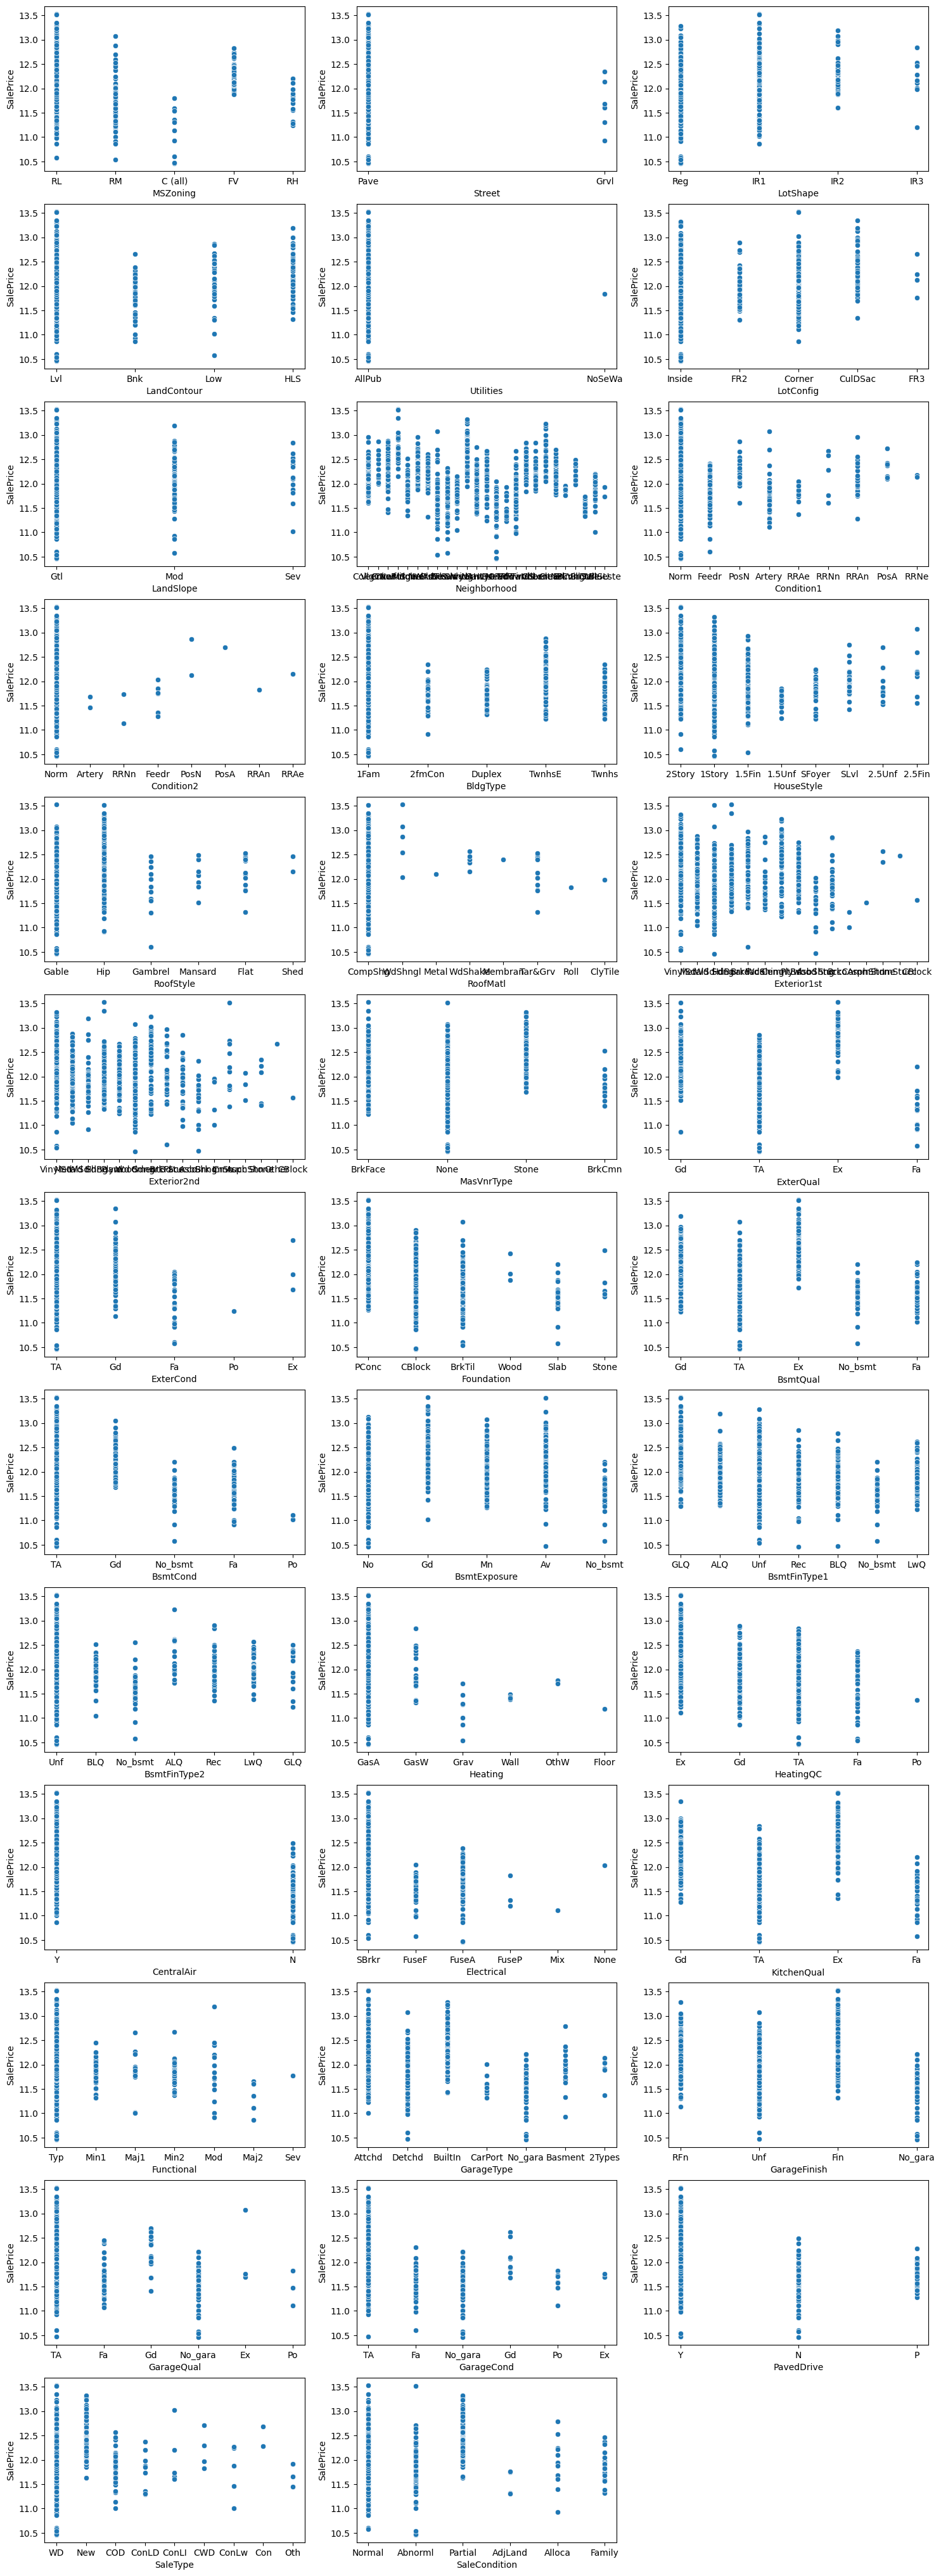

In [14]:
cat_number = len(category_columns)
plt.figure(figsize=(18, math.ceil(cat_number/3) * 4))

for i, column in enumerate(category_columns):
    plt.subplot(math.ceil(cat_number/3), 3, i+1)
    sns.scatterplot(x=column, y="SalePrice", data=data)

plt.show()

Có thể thấy một số trường phân loại bị mất cân bằng như "Street", "Utilities", "Condition2",... Ngoài ra các trường "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "HeatingQC", "CentralAir", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond" và "PavedDrive" ta sẽ chuyển qua dạng số giống "OverallQual" (Label Encoding thay vì One Hot Encoding).

In [15]:
data["ExterQual"] = data["ExterQual"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["ExterCond"] = data["ExterCond"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["BsmtQual"] = data["BsmtQual"].map({"No_bsmt": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["BsmtCond"] = data["BsmtCond"].map({"No_bsmt": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["BsmtExposure"] = data["BsmtExposure"].map({"No_bsmt": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4})
data["HeatingQC"] =data["HeatingQC"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["CentralAir"] =data["CentralAir"].map({"N": 0, "Y": 1})
data["KitchenQual"] = data["KitchenQual"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["GarageFinish"] = data["GarageFinish"].map({"No_gara": 0, "Unf": 1, "RFn": 2, "Fin": 3})
data["GarageQual"] = data["GarageQual"].map({"No_gara": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["GarageCond"] = data["GarageCond"].map({"No_gara": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["PavedDrive"] = data["PavedDrive"].map({"N": 0, "P": 1, "Y": 2})

In [16]:
change_type = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "HeatingQC", "CentralAir", "KitchenQual", "GarageFinish",
               "GarageQual", "GarageCond", "PavedDrive"]

category_columns = [x for x in category_columns if x not in change_type]

Hãy xem chúng có ảnh hưởng tới giá nhà ra sao

In [17]:
category_score = {}

for col in category_columns:
    score = mutual_info_classif(X=data[["SalePrice"]], y=data[col], random_state=10)
    category_score[col] = {"Score": score[0]}

category_score = pd.DataFrame(data=category_score)
category_score = category_score.transpose().sort_values(by="Score", ascending=False)
category_score

Score
Neighborhood  0.5309
GarageType    0.2088
Foundation    0.1988
Exterior2nd   0.1578
BsmtFinType1  0.1465
Exterior1st   0.1313
MSZoning      0.1247
MasVnrType    0.0946
LotShape      0.0906
HouseStyle    0.0845
SaleType      0.0797
SaleCondition 0.0781
Electrical    0.0530
BldgType      0.0486
BsmtFinType2  0.0337
LandContour   0.0273
Condition1    0.0195
Heating       0.0153
RoofStyle     0.0149
LotConfig     0.0114
Functional    0.0070
RoofMatl      0.0064
LandSlope     0.0030
Condition2    0.0023
Street        0.0001
Utilities     0.0000

Chúng đều ít nhiều có ảnh hưởng đến giá nhà. Ta sẽ lấy các đặc trưng có score > 0.01

Tìm hiểu thêm một chút về các trường phân loại đã chọn

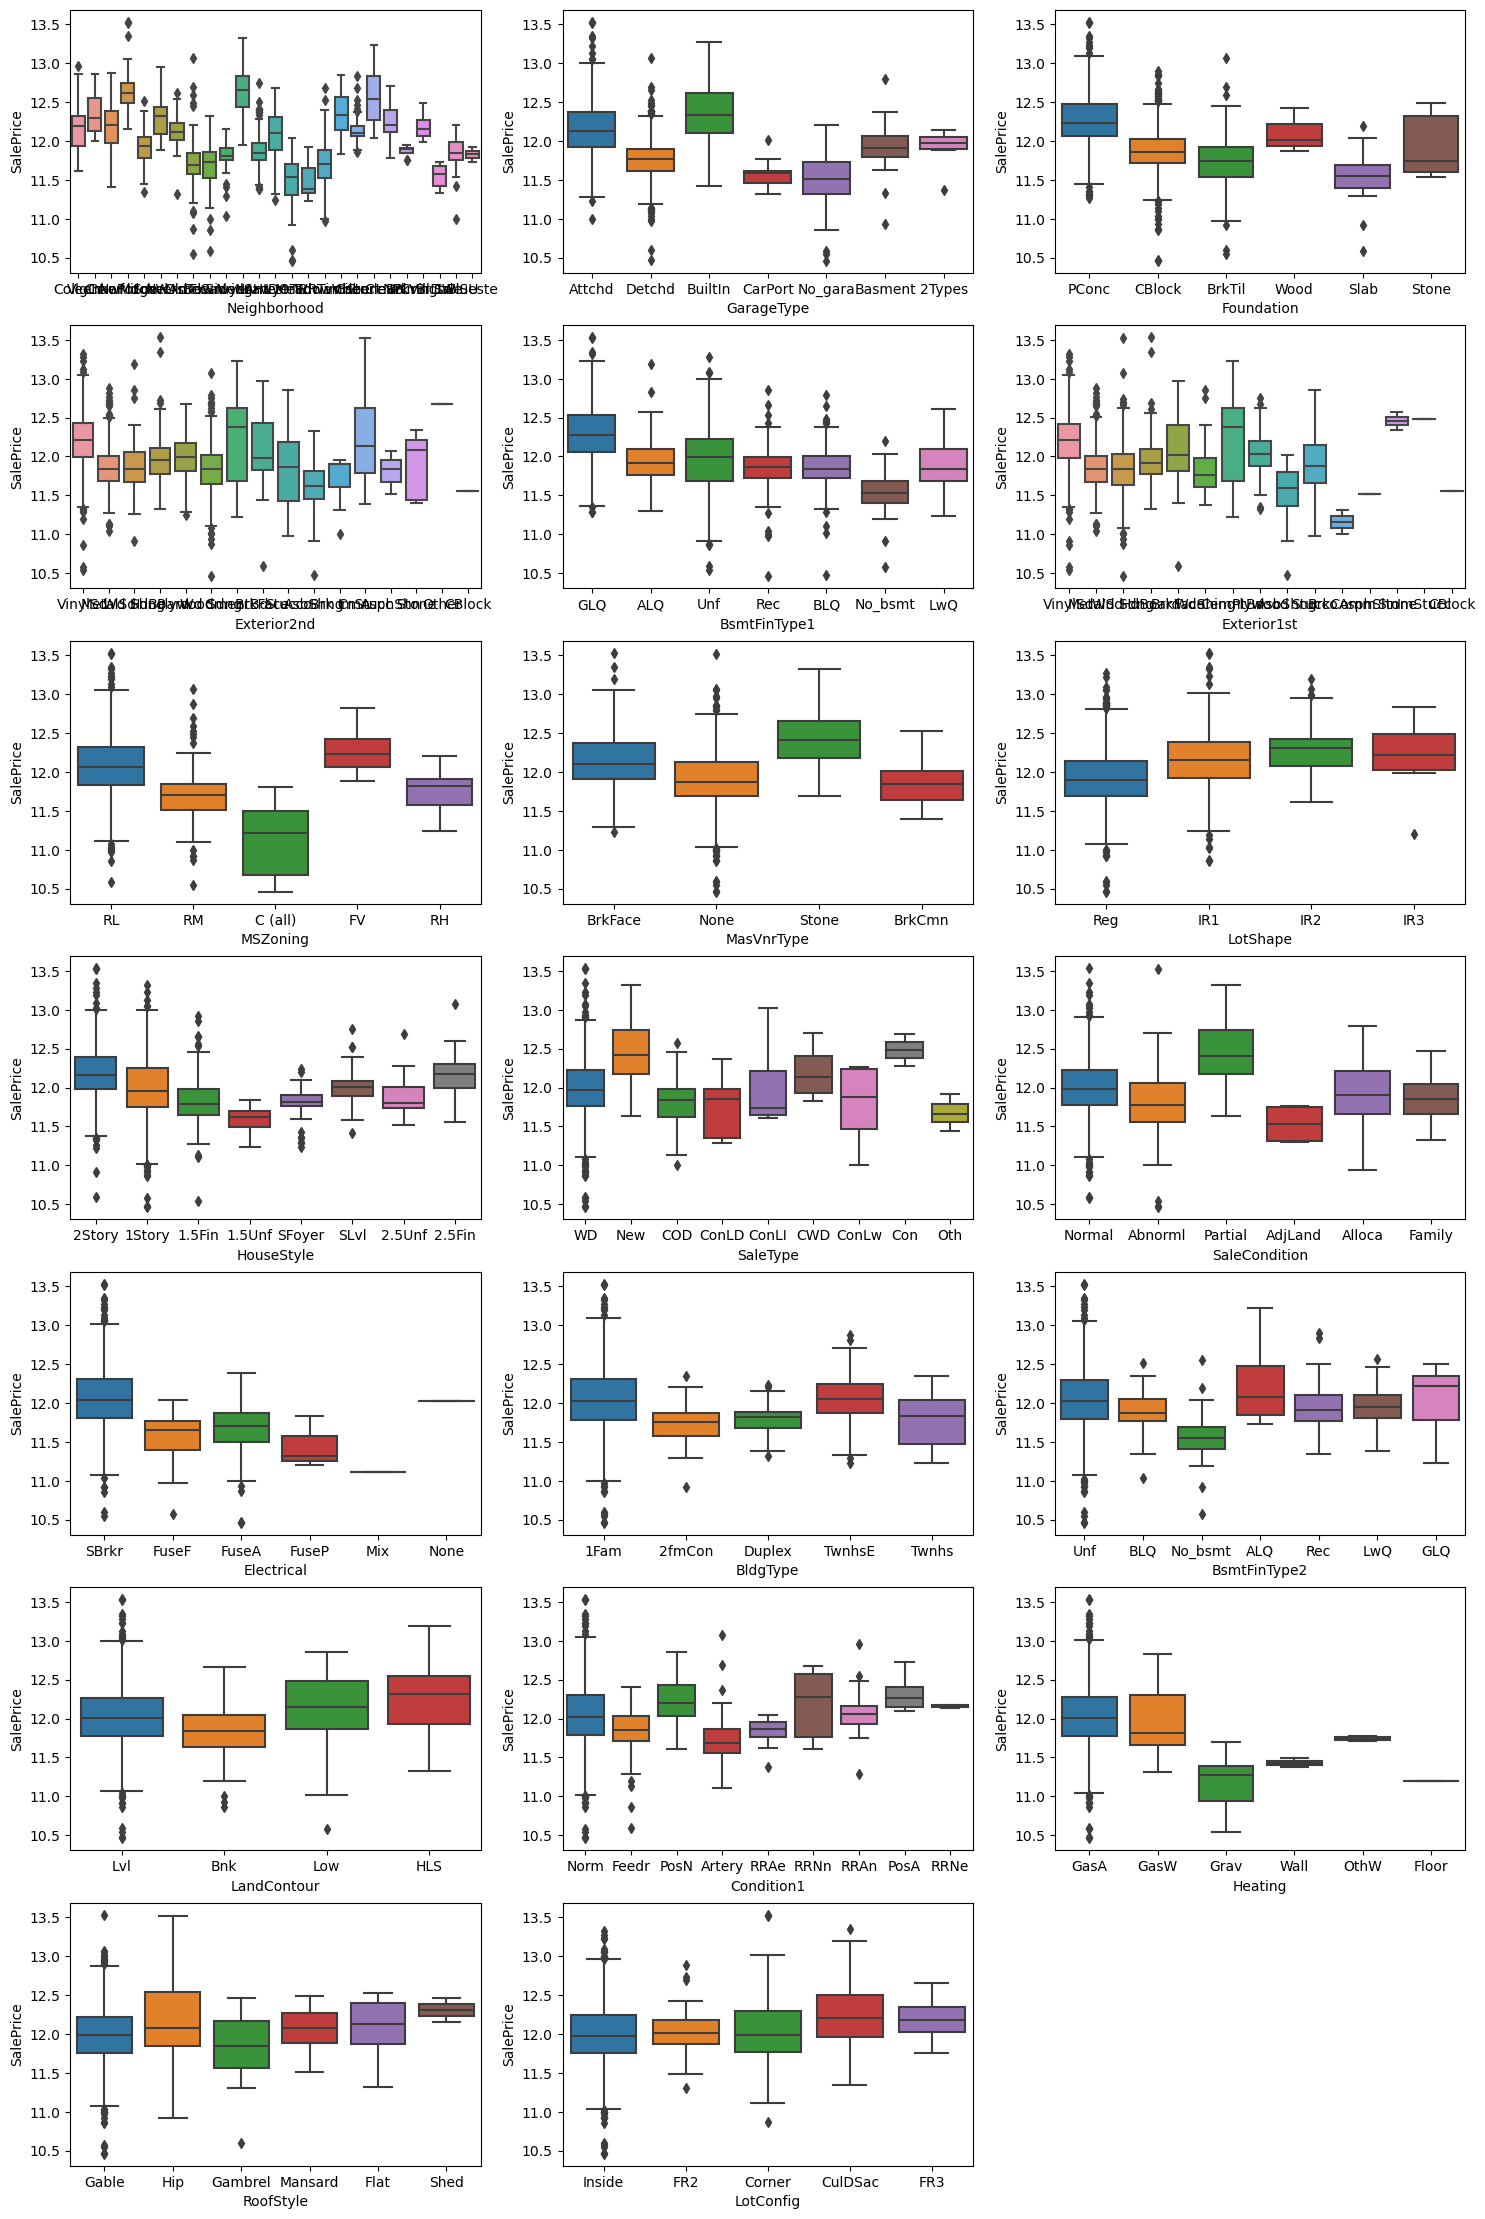

In [18]:
category_columns = category_score[category_score["Score"] > 0.01].index.tolist()
cat_number = len(category_columns)

plt.figure(figsize=(18, math.ceil(cat_number/3) * 4))

for i, column in enumerate(category_columns):
    plt.subplot(math.ceil(cat_number/3), 3, i+1)
    sns.boxplot(x=column, y="SalePrice", data=data)

plt.show()

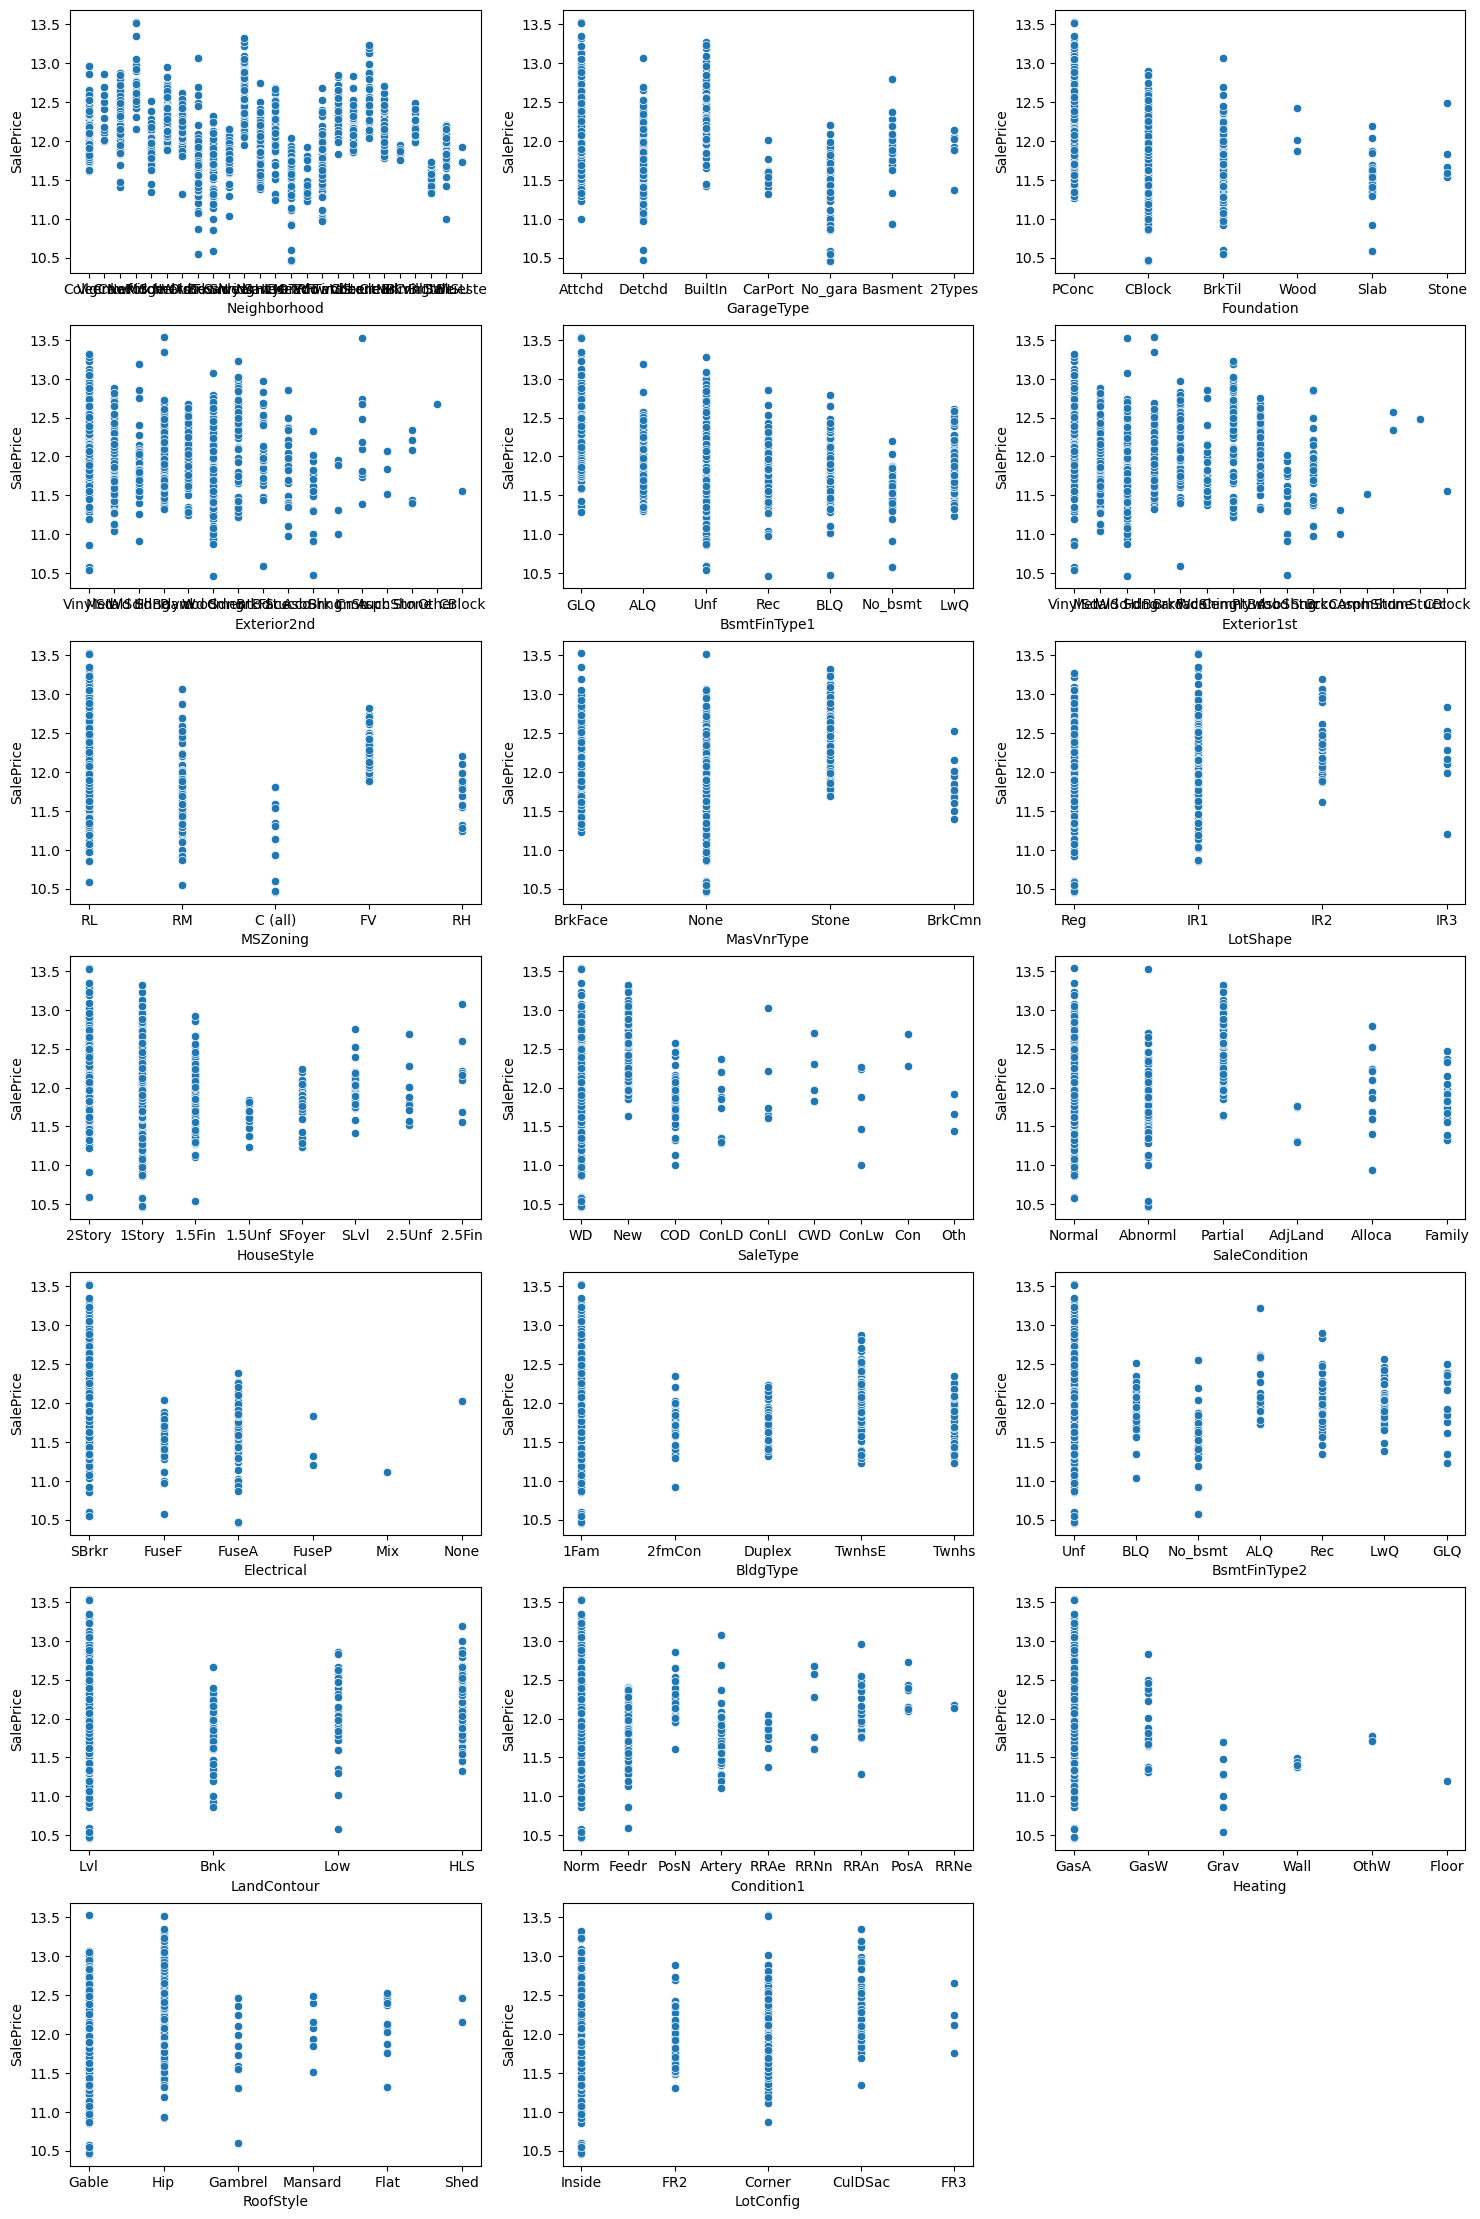

In [19]:
plt.figure(figsize=(18, math.ceil(cat_number/3) * 4))

for i, column in enumerate(category_columns):
    plt.subplot(math.ceil(cat_number/3), 3, i+1)
    sns.scatterplot(x=column, y="SalePrice", data=data)

plt.show()

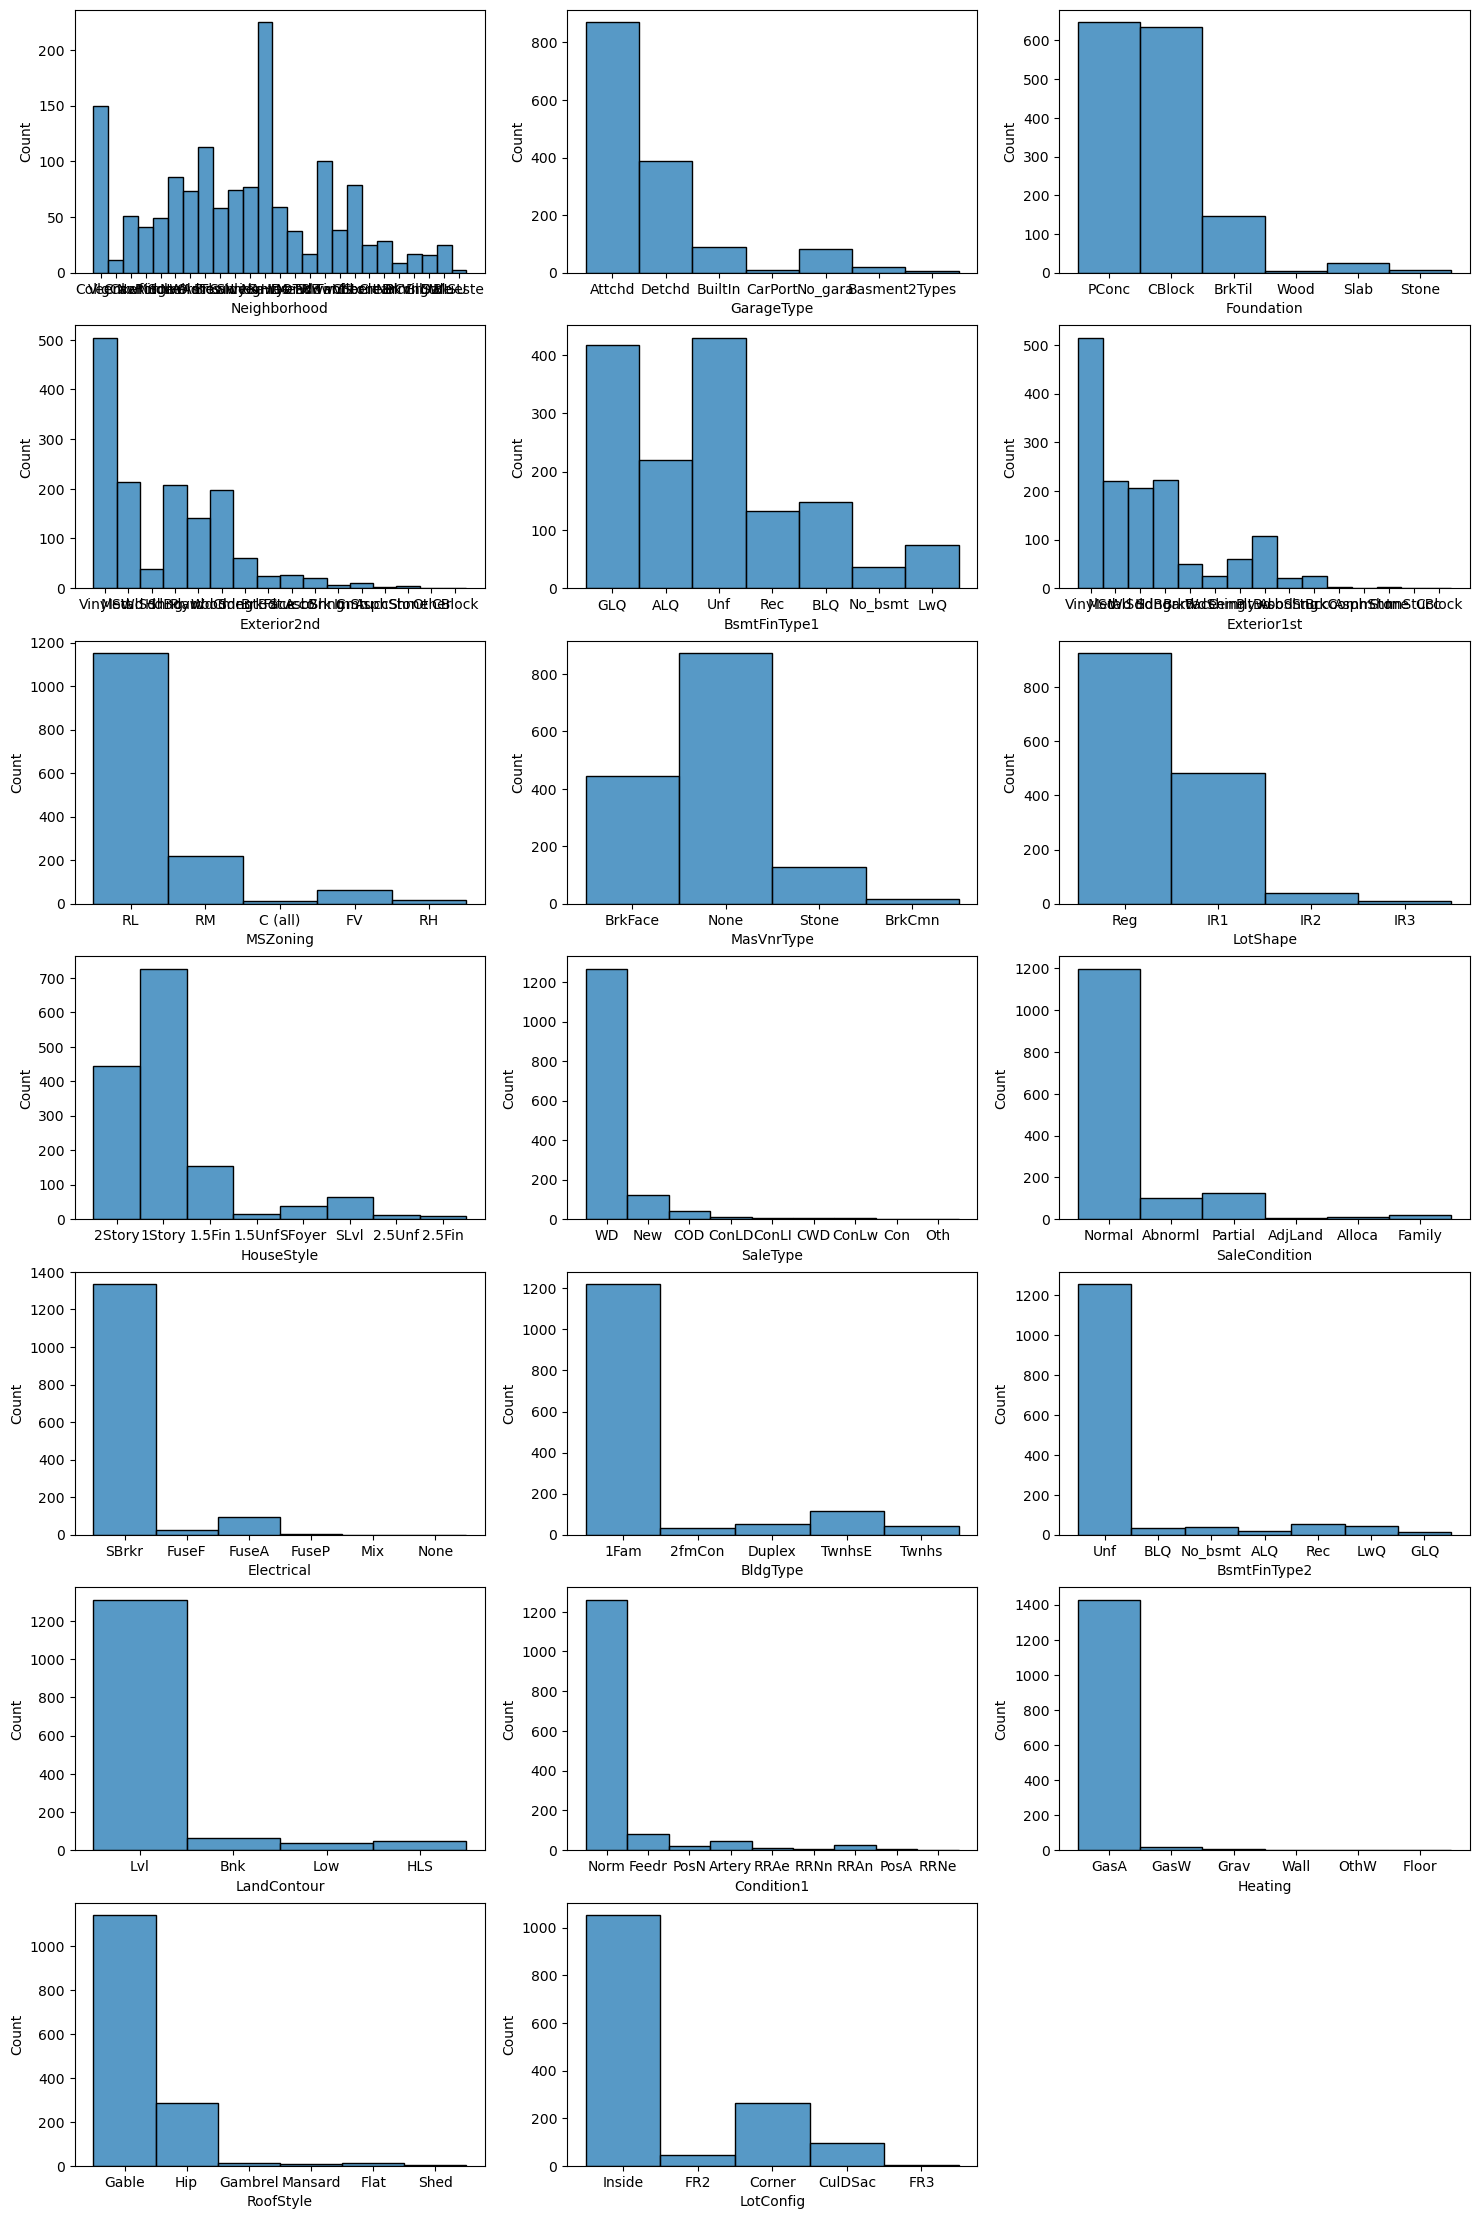

In [20]:
plt.figure(figsize=(18, math.ceil(cat_number/3) * 4))

for i, column in enumerate(category_columns):
    plt.subplot(math.ceil(cat_number/3), 3, i+1)
    sns.histplot(data[column])

plt.show()

Các trường 'LandContour', 'Condition1', 'BsmtFinType2', 'Heating', 'Electrical' bị mất cân bằng, ta sẽ thử loại ra khỏi dữ liệu khi xây dựng mô hình.

Tiếp theo kiểm tra ảnh hưởng của của các đặng trưng dạng số:

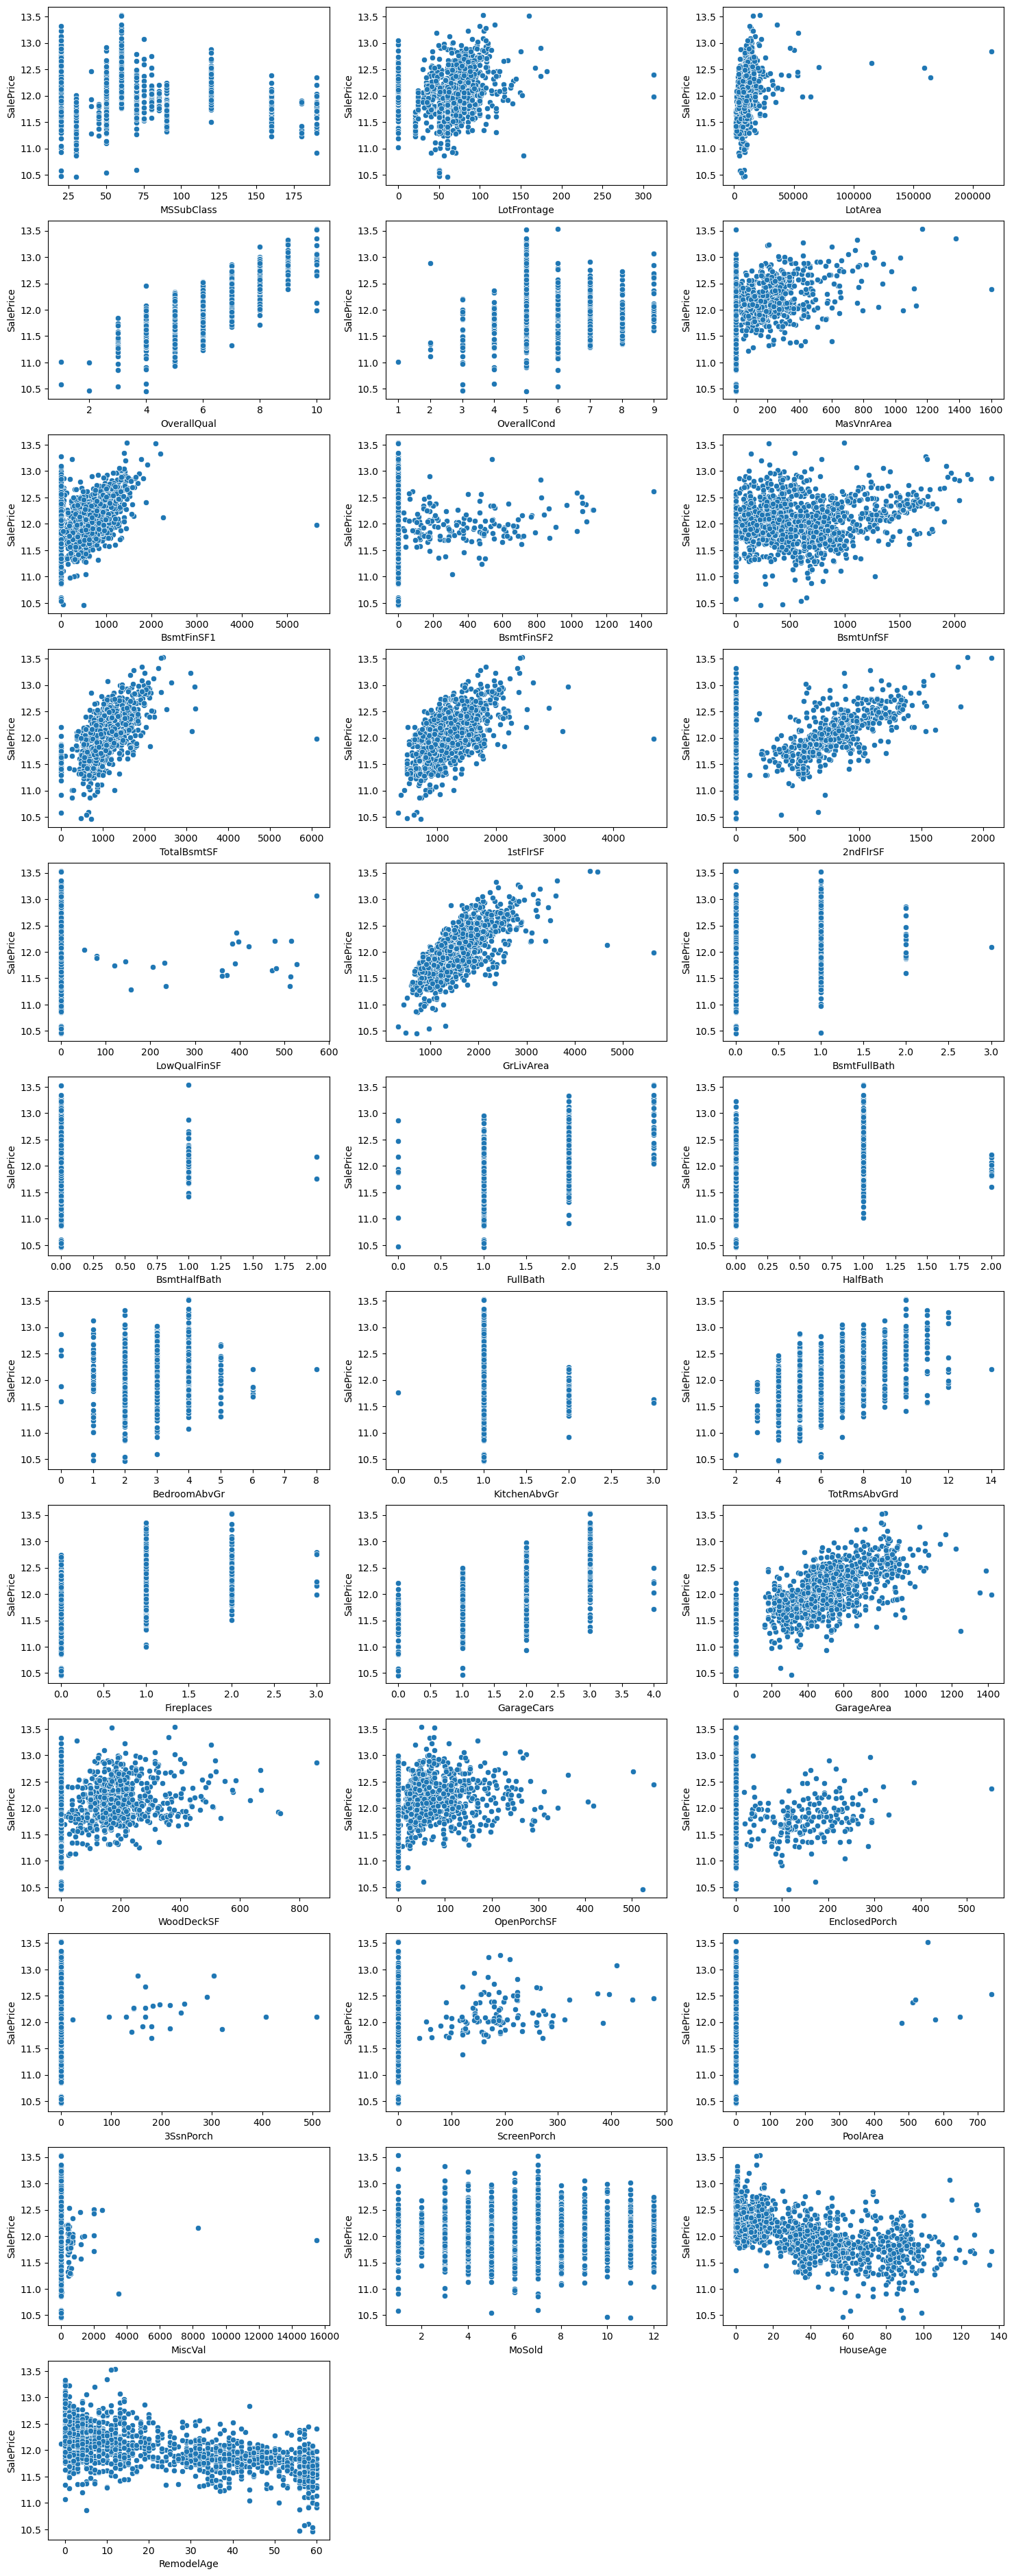

In [21]:
numerical = len(numerical_columns)

plt.figure(figsize=(18, math.ceil(numerical/3) * 4))

for i, column in enumerate(numerical_columns):
    plt.subplot(math.ceil(numerical/3), 3, i+1)
    sns.scatterplot(x=column, y="SalePrice", data=data)

plt.show()

Có 6 fields có outlier cần xử lý là "LotFrontage", "LotArea", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF" và "GrLivArea". Ngoài ra có một số field bị mất cân bằng dữ liệu có thể kể như "LowQualFinSF", "3SsnPorch", "PoolArea", "MiscVal",...

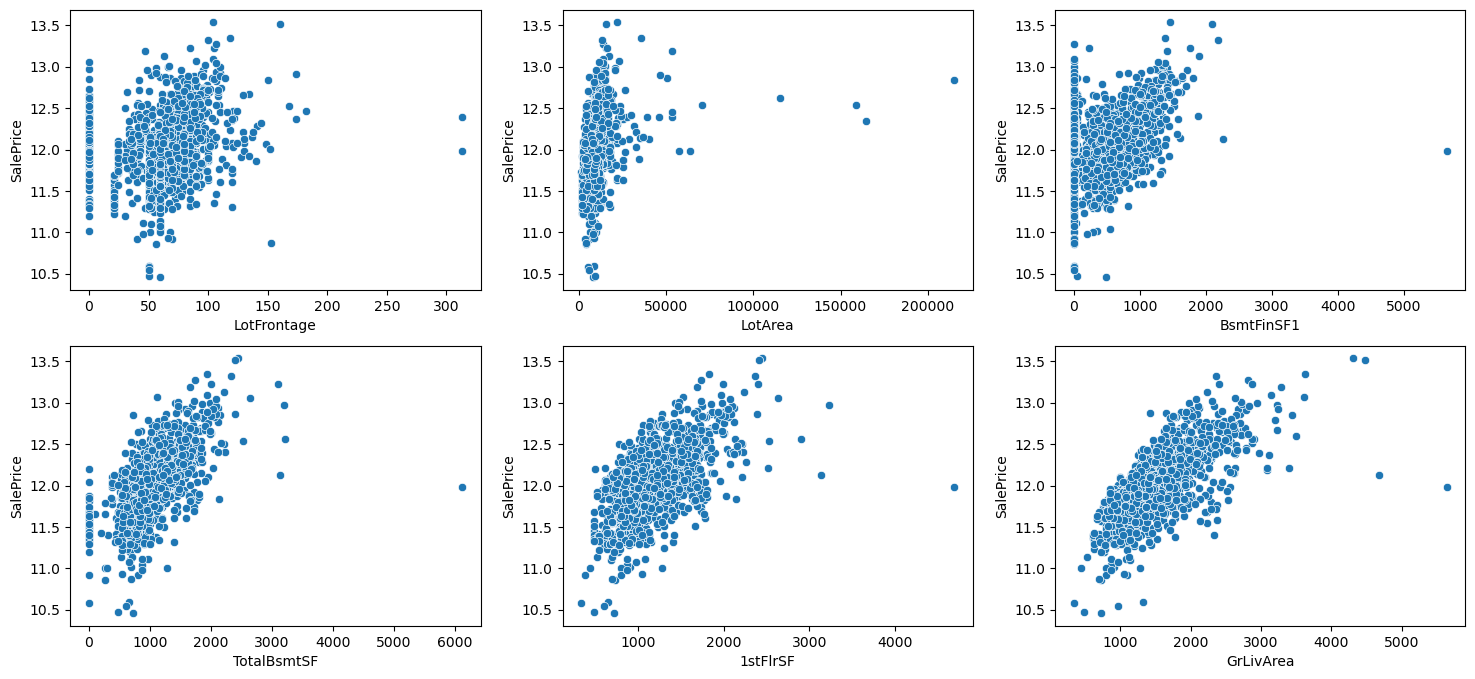

In [22]:
outlier_columns = ["LotFrontage", "LotArea", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea"]

plt.figure(figsize=(18, 8))

for i, column in enumerate(outlier_columns):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=column, y="SalePrice", data=data)

plt.show()

Kiểm tra xem cột nào có phân phối không đều ta sẽ áp hàm log cho nó

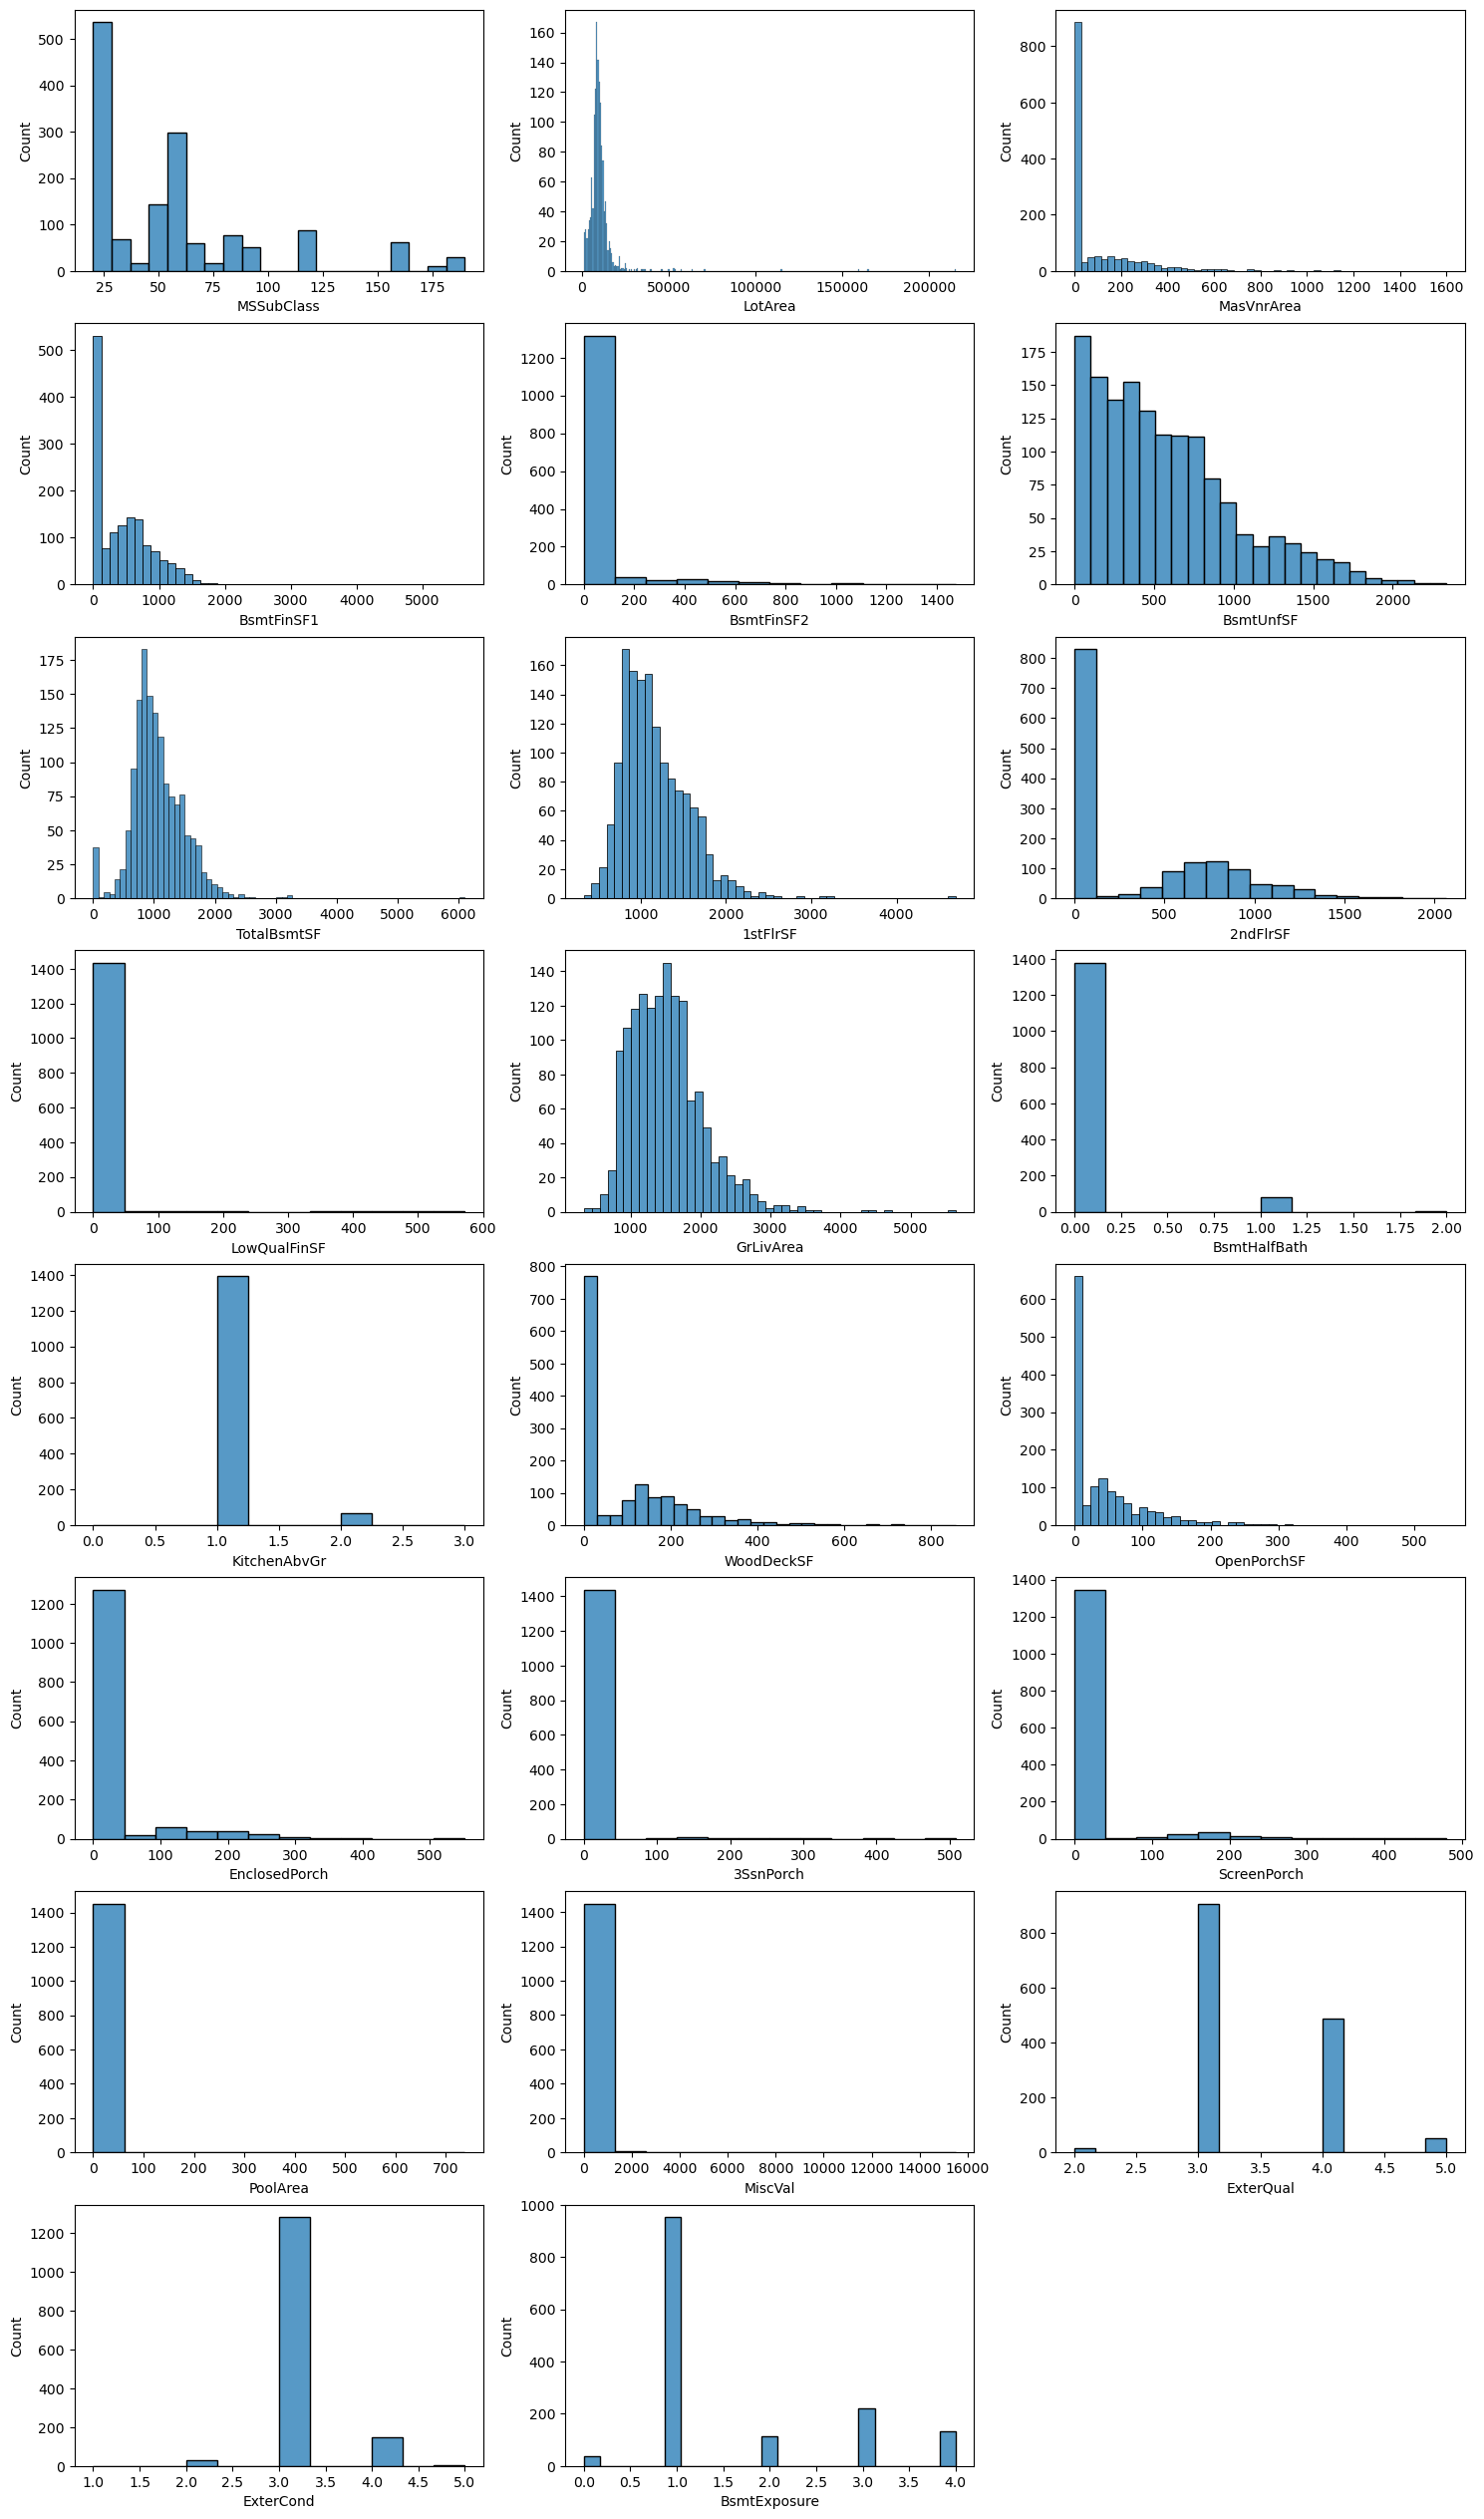

In [23]:
numerical_columns.extend(change_type)

skewed_features = data[numerical_columns].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features = skewed_features.index.tolist()

skewed_number = len(skewed_features)

plt.figure(figsize=(18, math.ceil(skewed_number/3) * 4))

for i, column in enumerate(skewed_features):
    plt.subplot(math.ceil(skewed_number/3), 3, i+1)
    sns.histplot(data[column])

plt.show()

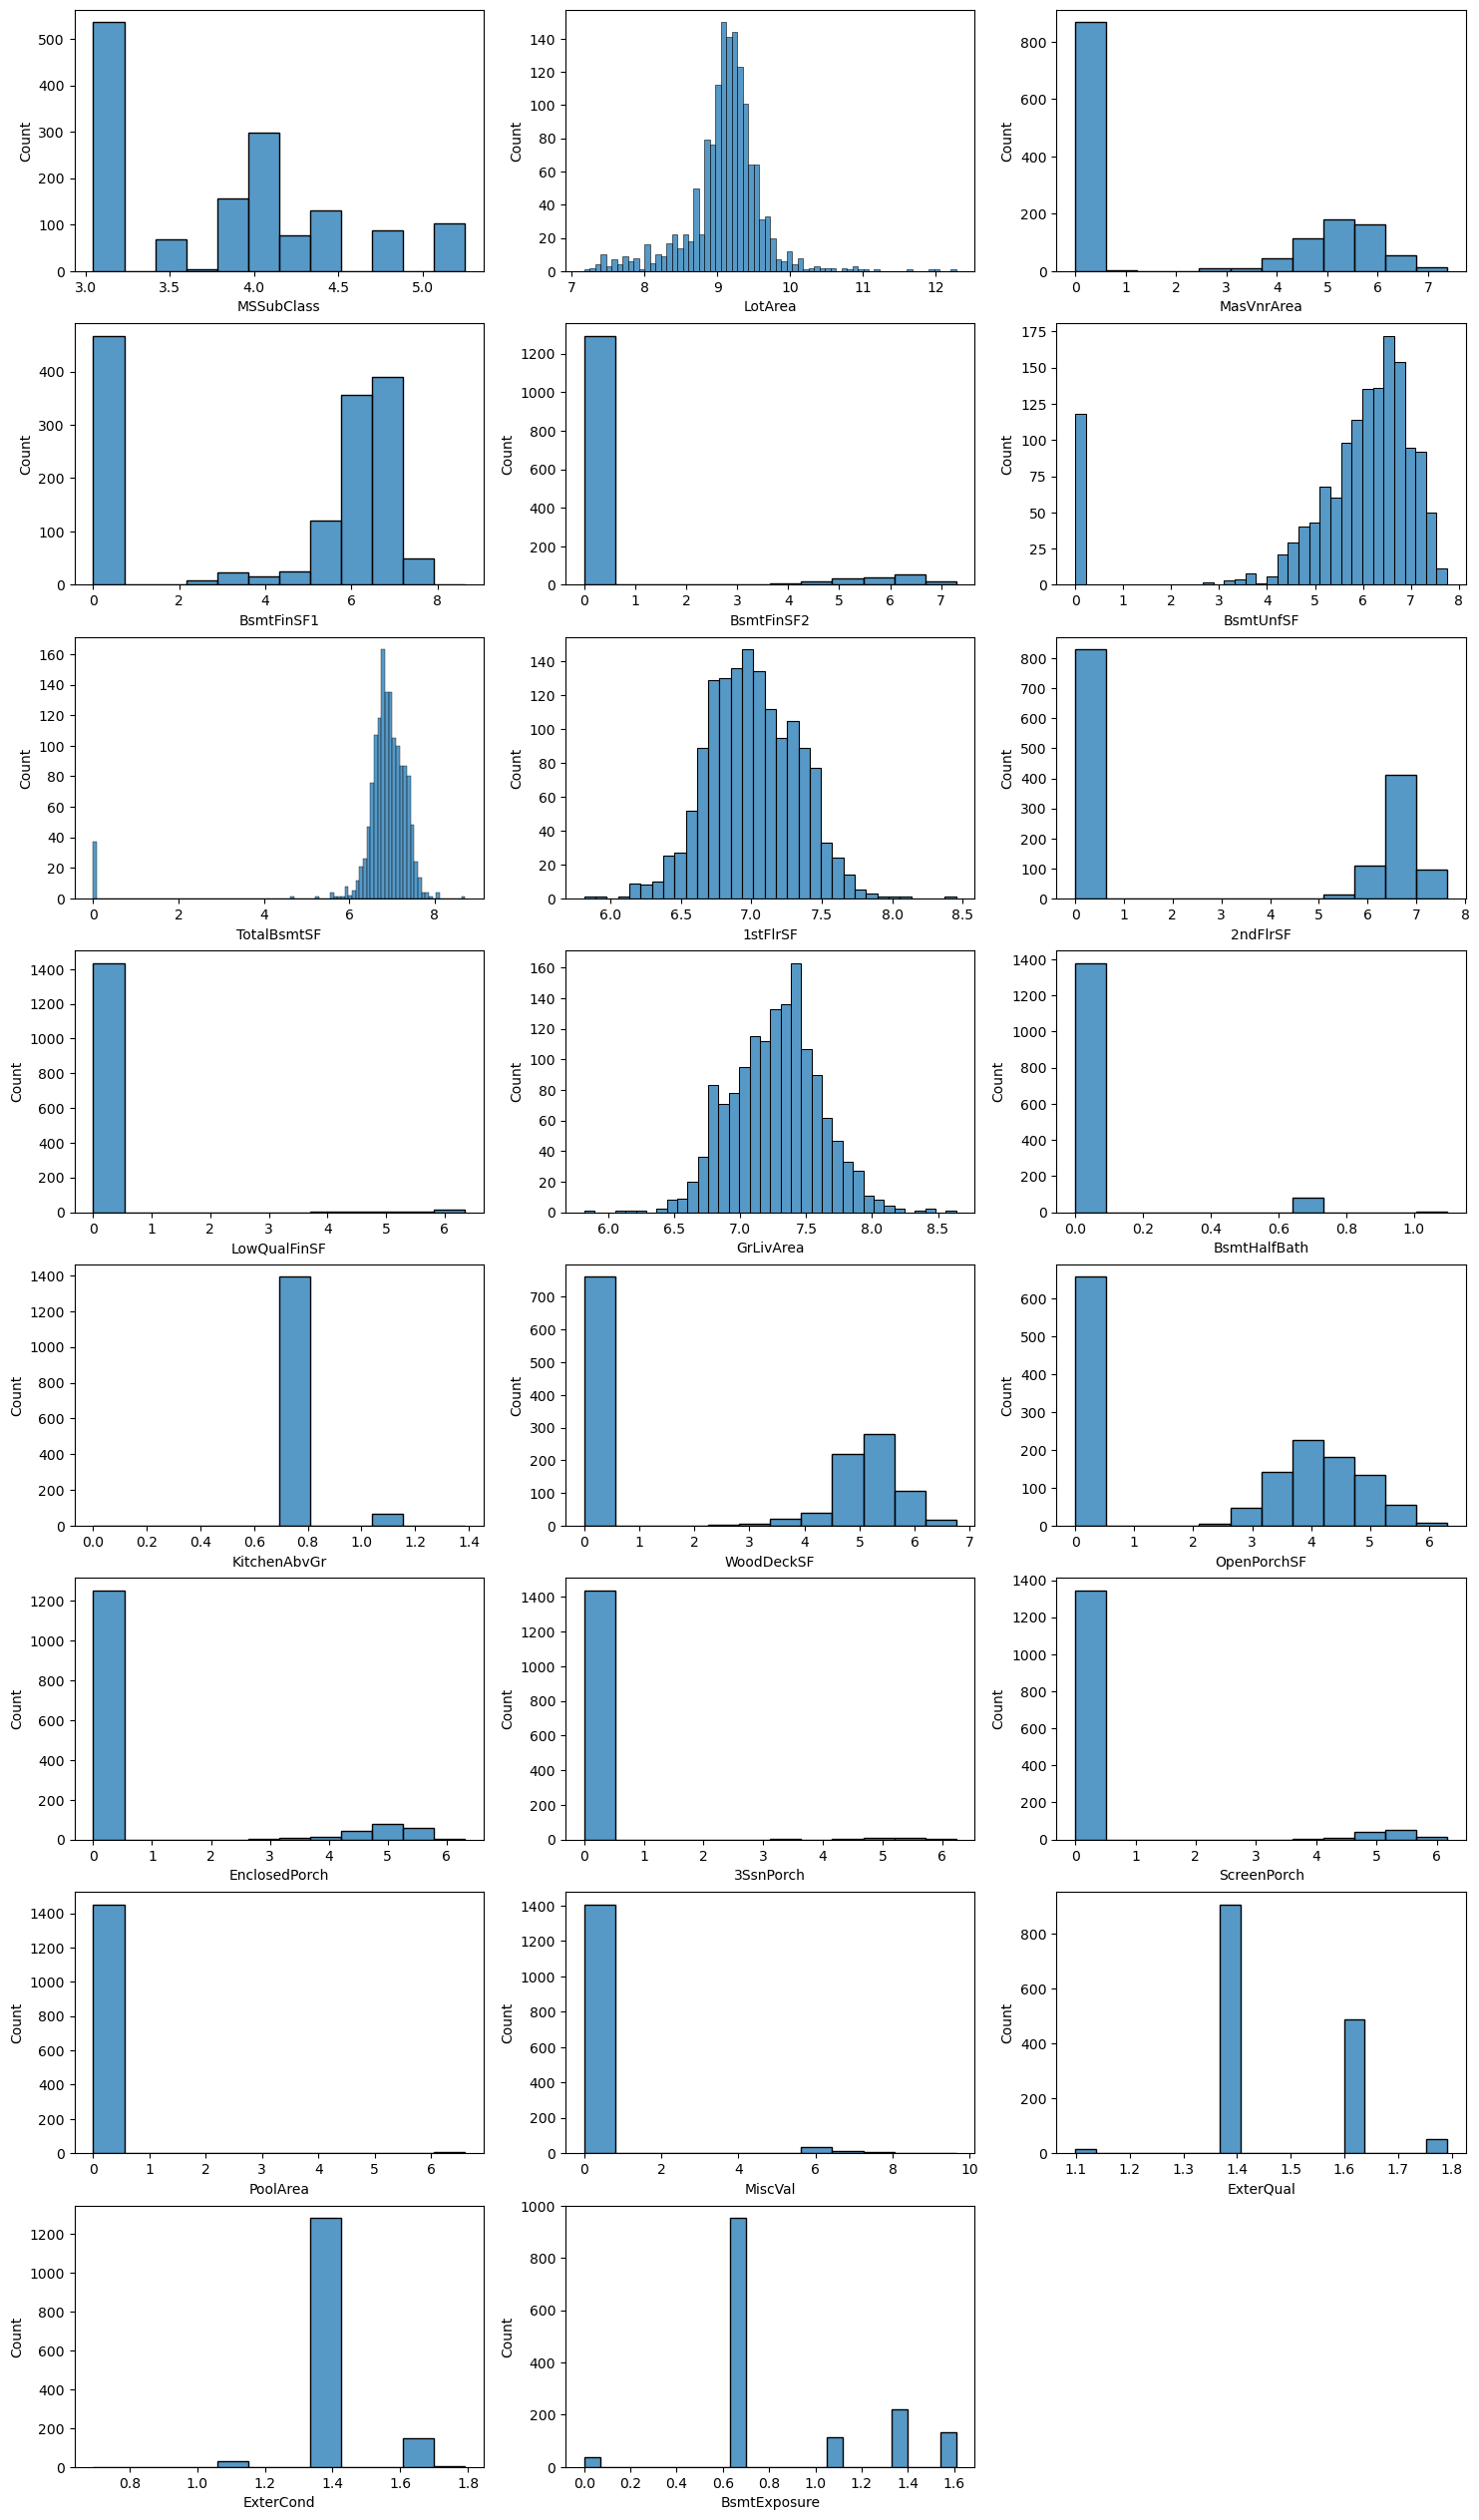

In [24]:
for f in skewed_features:
    data[f] = np.log1p(data[f])

plt.figure(figsize=(18, math.ceil(skewed_number/3) * 4))

for i, column in enumerate(skewed_features):
    plt.subplot(math.ceil(skewed_number/3), 3, i+1)
    sns.histplot(data[column])

plt.show()

Đánh giá ảnh hưởng của các đặc trưng số bằng "Pearson’s r" vs "mutual information"

In [25]:
numerical_r = {}

for col in numerical_columns:
    score = r_regression(X=data[[col]], y=data["SalePrice"])
    numerical_r[col] = {"Score": abs(score[0])}

numerical_r = pd.DataFrame(data=numerical_r)
numerical_r = numerical_r.transpose().sort_values(by="Score", ascending=False)

In [26]:
numerical_score = {}

for col in numerical_columns:
    score = mutual_info_regression(X=data[[col]], y=data["SalePrice"], random_state=10)
    numerical_score[col] = {"Score": score[0]}

numerical_score = pd.DataFrame(data=numerical_score)
numerical_score = numerical_score.transpose().sort_values(by="Score", ascending=False)

Chỉ lấy các đặc trưng có "mutual information" > 0.01 và "Pearson’s r" > 0.1

In [27]:
r_columns = numerical_r[numerical_r["Score"] > 0.1].index.tolist()
mi_columns = numerical_score[numerical_score["Score"] > 0.01].index.tolist()
print(len(r_columns))
print(len(mi_columns))
print(len(numerical_columns))

36
40
46


In [28]:
print(set(mi_columns).issubset(r_columns))
print(set(r_columns).issubset(mi_columns))

False
True


Có thể thấy 2 phương pháp cho kết quả khác nhau. Vậy ta sẽ theo chỉ số nào? Cùng thử cả 2 để xem bộ dữ liệu nào sẽ tốt hơn.

Hãy tìm hiểu thêm về các cột đã chọn:

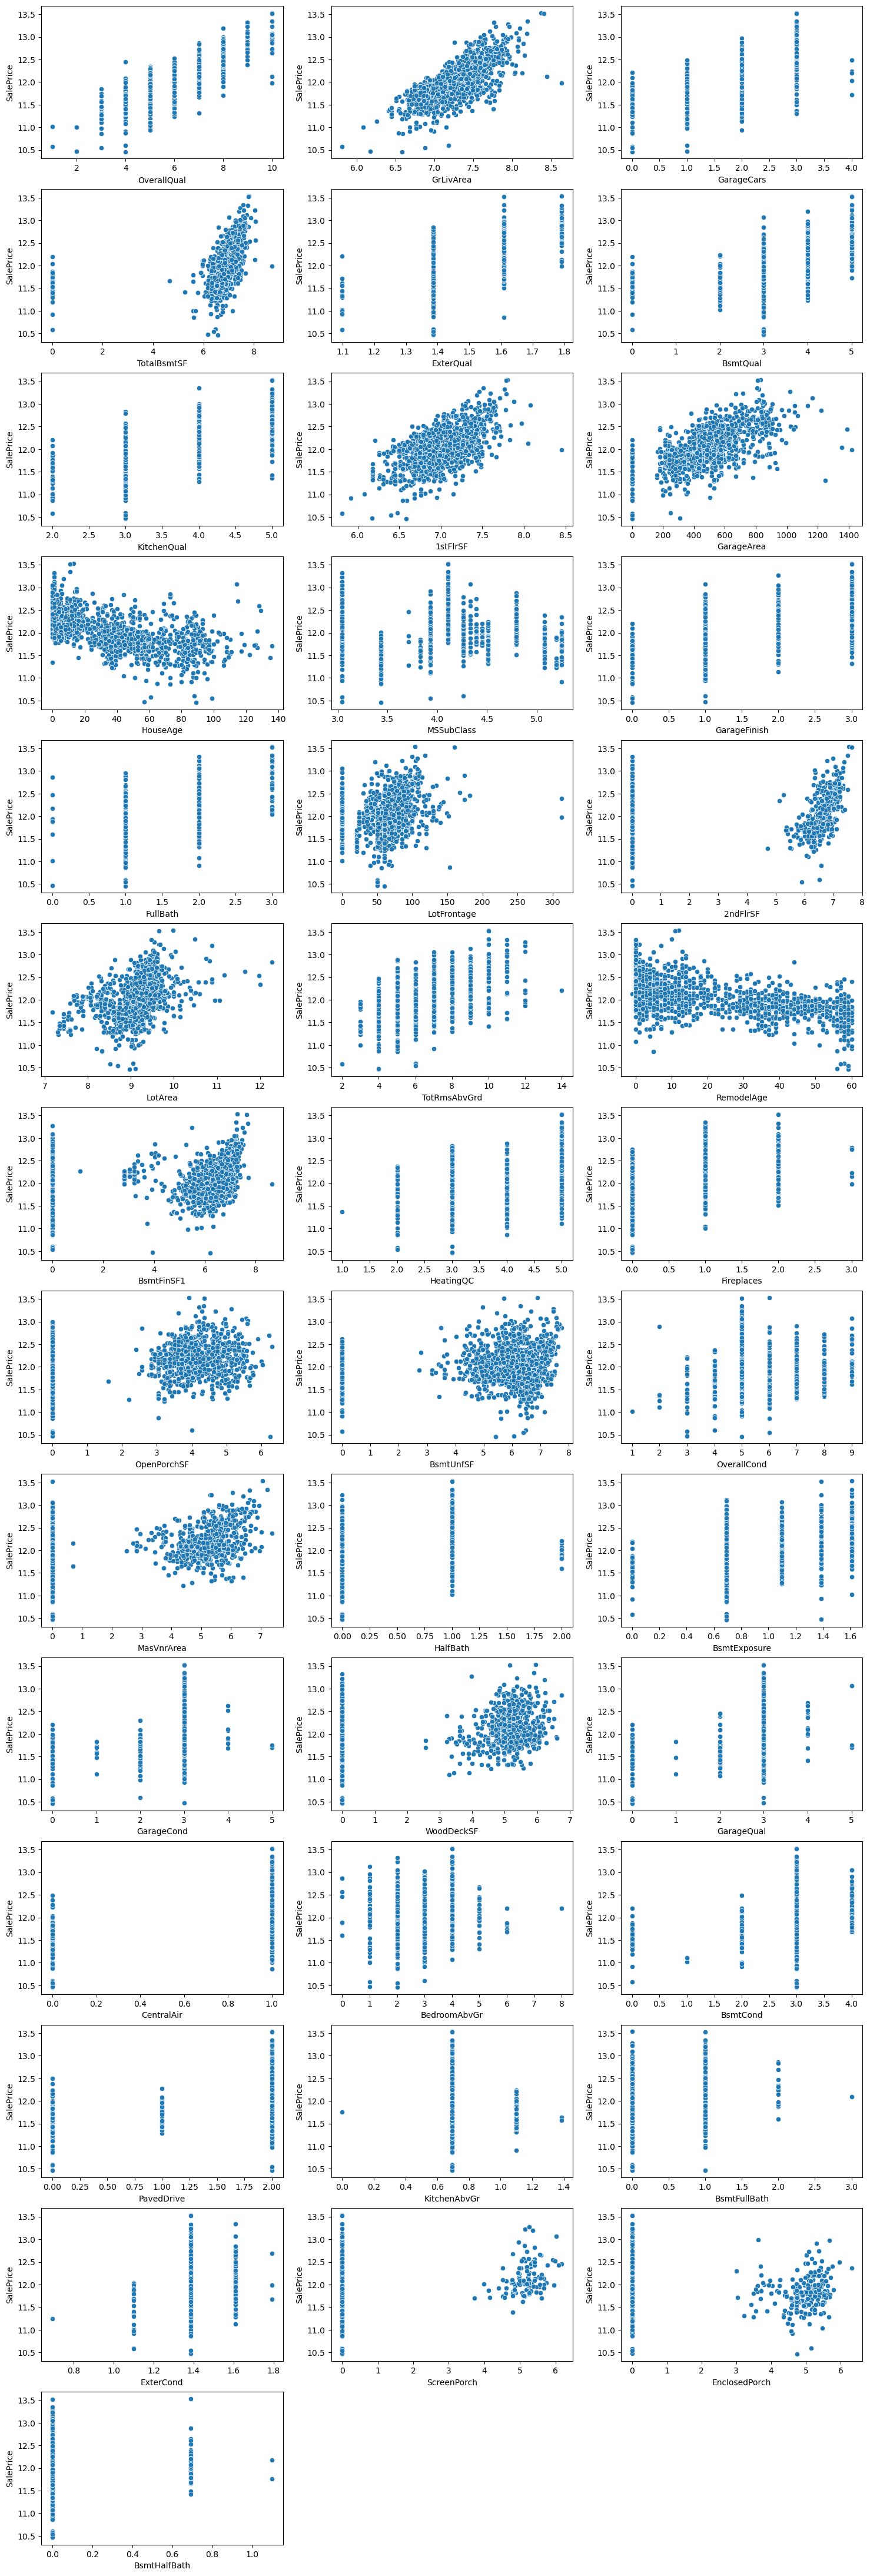

In [29]:
mi_number = len(mi_columns)

plt.figure(figsize=(18, math.ceil(mi_number/3) * 4))

for i, column in enumerate(mi_columns):
    plt.subplot(math.ceil(mi_number/3), 3, i+1)
    sns.scatterplot(x=column, y="SalePrice", data=data)

plt.show()

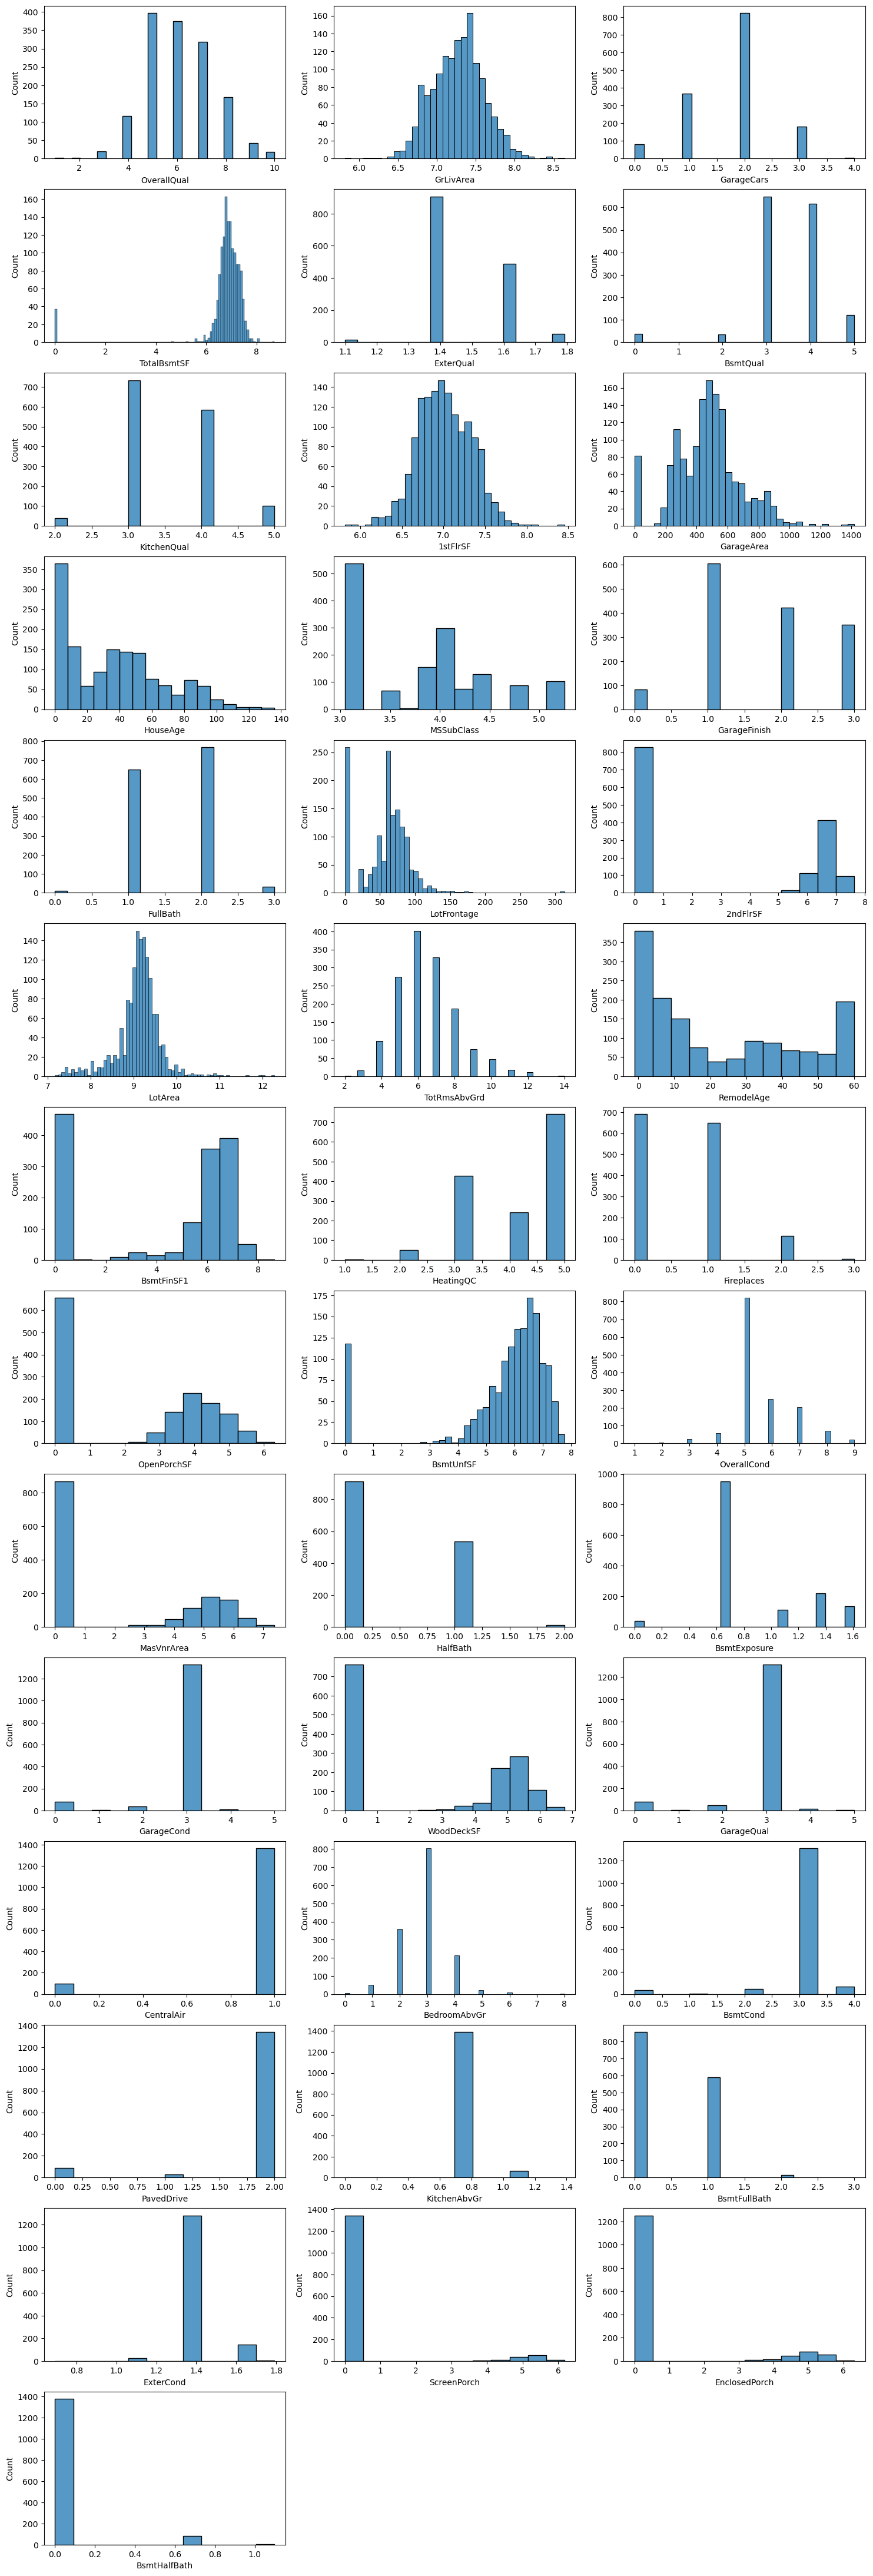

In [30]:
plt.figure(figsize=(18, math.ceil(mi_number/3) * 4))

for i, column in enumerate(mi_columns):
    plt.subplot(math.ceil(mi_number/3), 3, i+1)
    sns.histplot(data[column])

plt.show()

Các trường "GarageQual", "GarageCond", "CentralAir", "BsmtCond", "PavedDrive", "KitchenAbvGr", "ExterCond", "ScreenPorch", "EnclosedPorch", "BsmtHalfBath" bị mất cân bằng  dữ liệu, ta sẽ thử bỏ chọn chúng lúc xây dựng mô hình.

In [31]:
print(mi_columns)
print()
print(category_columns)

['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual', '1stFlrSF', 'GarageArea', 'HouseAge', 'MSSubClass', 'GarageFinish', 'FullBath', 'LotFrontage', '2ndFlrSF', 'LotArea', 'TotRmsAbvGrd', 'RemodelAge', 'BsmtFinSF1', 'HeatingQC', 'Fireplaces', 'OpenPorchSF', 'BsmtUnfSF', 'OverallCond', 'MasVnrArea', 'HalfBath', 'BsmtExposure', 'GarageCond', 'WoodDeckSF', 'GarageQual', 'CentralAir', 'BedroomAbvGr', 'BsmtCond', 'PavedDrive', 'KitchenAbvGr', 'BsmtFullBath', 'ExterCond', 'ScreenPorch', 'EnclosedPorch', 'BsmtHalfBath']

['Neighborhood', 'GarageType', 'Foundation', 'Exterior2nd', 'BsmtFinType1', 'Exterior1st', 'MSZoning', 'MasVnrType', 'LotShape', 'HouseStyle', 'SaleType', 'SaleCondition', 'Electrical', 'BldgType', 'BsmtFinType2', 'LandContour', 'Condition1', 'Heating', 'RoofStyle', 'LotConfig']


In [32]:
[x for x in mi_columns if x not in r_columns]

['MSSubClass', 'OverallCond', 'ExterCond', 'BsmtHalfBath']

Cho tới hiện tại chúng ta có 20 category features và 40 numerical features cho mô hình.

Phần sau ta sẽ thử nghiệm mô hình với tất cả dữ liệu, với bộ dữ liệu mà cột dạng số chọn bởi "mutual information" và bộ ít dữ liệu hơn với đặc trưng số chọn bởi "Pearson r".